### V392 Per Spectral Index work

In [1]:
#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#the bulk of the data

In [21]:
data = ([58238.93,	1.26,	-0.0122,	0.0531,	1],
[58238.93,	1.74,	0.0298,	0.0385,	1],
[58238.93,	5,	0.0152,	0.012,	1],
[58238.93,	7,	-0.0184,	0.0143,	1],
[58246.67,	5,	0.232,	0.0125,	9],
[58246.67,	7,	0.3,	0.0125,	9],
[58246.68,	13.5,	0.435,	0.0181,	9],
[58246.68,	16.5,	0.342,	0.0186,	9],
[58246.68,	29.5,	0.968,	0.0239,	9],
[58246.68,	35,	0.913,	0.0231,	9],
[58250.64,	1.26,	0.114,	0.0474,	13],
[58250.64,	1.74,	0.15,	0.0419,	13],
[58250.64,	5,	0.5,	0.0132,	13],
[58250.64,	7,	0.751,	0.0147,	13],
[58255.65,	13.5,	7.378,	0.0135,	18],
[58255.65,	16.5,	8.321,	0.0171,	18],
[58255.65,	29.5,	11.851,	0.0286,	18],
[58255.65,	35,	12.991,	0.035,	18],
[58255.71,	8.416,	7.136,	0.0322,	18],
[58256.62,	1.26,	0.626,	0.0562,	19],
[58256.62,	1.74,	0.948,	0.0424,	19],
[58256.62,	5,	3.227,	0.0131,	19],
[58256.62,	7,	4.202,	0.0214,	19],
[58259.7,	4.868,	3.932,	0.0196,	22],
[58260.96,	1.26,	1.576,	0.0616,	23],
[58260.96,	1.74,	2.015,	0.041,	23],
[58260.96,	5,	4.523,	0.0134,	23],
[58260.96,	7,	5.889,	0.0152,	23],
[58269.56,	13.5,	7.582,	0.0116,	32],
[58269.56,	16.5,	8.545,	0.0131,	32],
[58269.56,	29.5,	14.418,	0.0485,	32],
[58269.56,	35,	17.162,	0.0565,	32],
[58269.61,	1.26,	3.471,	0.0551,	32],
[58269.61,	1.74,	3.887,	0.0374,	32],
[58269.61,	5,	5.226,	0.0122,	32],
[58269.61,	7,	5.994,	0.0134,	32],
[58278.53,	13.5,	6.545,	0.012,	41],
[58278.53,	16.5,	7.35,	0.0141,	41],
[58278.53,	29.5,	11.934,	0.0594,	41],
[58278.53,	35,	13.925,	0.07,	41],
[58278.58,	1.26,	3.704,	0.0571,	41],
[58278.58,	1.74,	3.746,	0.0413,	41],
[58278.58,	5,	4.419,	0.0123,	41],
[58278.58,	7,	4.984,	0.0137,	41],
[58280.64,	8.416,	1.98,	0.036,	43],
[58283.6,	4.868,	3.57,	0.025,	46],	
[58323.5,	4.868,	1.2,	0.02,	86],
#	1.4			90
[58347.5,	1.4,	0.22,	0.035,	110],
[58368.38,	13.5,	3.017,	0.0111,	131],
[58368.38,	16.5,	3.089,	0.0125,	131],
[58368.38,	29.5,	3.164,	0.0266,	131],
[58368.38,	35,	3.116,	0.0338,	131],
[58368.43,	1.26,	0.971,	0.272,	131],
[58368.43,	1.74,	0.85,	0.116,	131],
[58368.43,	5,	1.865,	0.017,	131],
[58368.43,	7,	2.333,	0.0126,	131],
[58379.39,	13.5,	2.444,	0.0118,	142],
[58379.39,	16.5,	2.475,	0.0127,	142],
[58379.39,	29.5,	2.364,	0.0237,	142],
[58379.39,	35,	2.193,	0.0256,	142],
[58379.44,	1.26,	1.033,	0.223,	142],
[58379.44,	1.74,	0.417,	0.125,	142],
[58379.44,	5,	1.637,	0.0158,	142],
[58379.44,	7,	2.018,	0.0125,	142],		
[58423.19,	13.5,	1.2,	0.0127,	186],
[58423.19,	16.5,	1.207,	0.0117,	186],
[58423.19,	29.5,	1.068,	0.0241,	186],
[58423.19,	35,	1.125,	0.0276,	186],
[58423.58,	1.26,	-0.108,	0.241,	186],
[58423.58,	1.74,	0.511,	0.107,	186],
[58423.58,	5,	1.121,	0.0201,	186],
[58423.58,	7,	1.165,	0.0165,	186],
[58460.18,	1.26,	0.105,	0.111,	223],
[58460.18,	1.74,	0.349,	0.0714,	223],
[58460.18,	5,	0.766,	0.0137,	223],
[58460.18,	7,	0.782,	0.0131,	223],	
[58461.08,	13.5,	0.738,	0.0119,	224],
[58461.08,	16.5,	0.717,	0.0121,	224],
[58461.08,	29.5,	0.57,	0.0229,	224],
[58461.08,	35,	0.593,	0.0273,	224],
[58493.11,	1.26,	0.178,	0.151,	256],
[58493.11,	1.74,	0.402,	0.0811,	256],
[58493.11,	5,	0.559,	0.0158,	256],
[58493.11,	7,	0.589,	0.0186,	256],
[58496.01,	13.5,	0.521,	0.0114,	259],
[58496.01,	16.5,	0.529,	0.0118,	259],
[58496.01,	29.5,	0.426,	0.0266,	259],
[58496.01,	35,	0.414,	0.0309,	259],
[58519.04,	1.26,	0.111,	0.109,	282],
[58519.04,	1.74,	0.41,	0.0637,	282],
[58519.04,	5,	0.492,	0.0127,	282],
[58519.04,	7,	0.457,	0.0126,	282],
[58627.98,	1.26,	0.0193,	0.086,	390],
[58627.98,	1.78,	0.177,	0.044,	390],
[58627.98,	5,	0.157,	0.0145,	390],
[58627.98,	7,	0.176,	0.0143,	390],
[58628.64,	13.5,	0.139,	0.034,	391],
[58628.64,	16.5,	0.125,	0.0399,	391],
[58628.64,	29.5,	0.126,	0.0373,	391],
[58628.64,	35,	-0.0704,	0.0471,	391],
[58652.58,	1.26,	0.104,	0.0989,	415],
[58652.58,	1.78,	0.0834,	0.0396,	415],
[58652.58,	5,	0.165,	0.0134,	415],
[58652.58,	7,	0.157,	0.0143,	415],
[58658.62,	13.5,	0.0657,	0.0114,	419],
[58658.62,	16.5,	0.0483,	0.0201,	419],
[58658.62,	29.5,	0.104,	0.0352,	419],
[58658.62,	35,	0.137,	0.0421,	419],
[58711.46,	13.5,	0.032,	0.014,	474],
[58711.46,	16.5,	0.007,	0.015,	474],
[58711.46,	29.5,	-0.033,	0.034,	474],
[58711.46,	35,	-0.031,	0.043,	474],
[58712.62,	1.26,	0.38,	0.09,	475],
[58712.62,	1.78,	0.255,	0.067,	475],
[58712.62,	5,	0.075,	0.017,	475],
[58712.62,	7,	0.056,	0.02,	475],
#[58765.29,	1.26			528],
[58765.29,	1.78,	0.0962,	0.066,	528],
[58765.29,	5,	0.0426,	0.016,	528],
[58765.29,	7,	0.0304,	0.016,	528],
#[58839.82,	5,			611],
#[58839.82,	7,			611
[58839.82,	13.5,	0.0592,	0.017,	611],
[58839.82,	16.5,	0.0631,	0.018,	611],
[58839.82,	29.5,	0.002,	0.04,	611],
[58839.82,	35,	0.02,	0.044,	611],
[58924.11,	5,	0.117,	0.022,	687],
[58924.11,	7,	0.088,	0.021,	687],
[58924.11,	13.5,	0.037,	0.017,	687],
[58924.11,	16.5,	0.024,	0.018,	687],
[58924.11,	29.5,	0.14,	0.036,	687],
[58924.11,	35,	0.05,	0.041,	687],
[58984.93,	5,	0.0606,	0.016,	747],
[58984.93,	7,	0.062,	0.015,	747],
[58984.93,	13.5,	0.0423,	0.017,	747],
[58984.93,	16.5,	0.0532,	0.018,	747],
[58984.93,	29.5,	0.0229,	0.037,	747],
[58984.93,	35,	0.008,	0.043,	747])

df =  pd.DataFrame(data, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

In [22]:
#now to seperate it into days

In [24]:
E1=([58238.93,	1.26,	-0.0122,	0.0531,	1],
[58238.93,	1.74,	0.0298,	0.0385,	1],
[58238.93,	5,	0.0152,	0.012,	1],
[58238.93,	7,	-0.0184,	0.0143,	1],)

 
E2=([58246.67,	5,	0.232,	0.0125,	9],
[58246.67,	7,	0.3,	0.0125,	9],
[58246.68,	13.5,	0.435,	0.0181,	9],
[58246.68,	16.5,	0.342,	0.0186,	9],
[58246.68,	29.5,	0.968,	0.0239,	9],
[58246.68,	35,	0.913,	0.0231,	9],)

 
E3=([58250.64,	1.26,	0.114,	0.0474,	13],
[58250.64,	1.74,	0.15,	0.0419,	13],
[58250.64,	5,	0.5,	0.0132,	13],
[58250.64,	7,	0.751,	0.0147,	13],)

 
E4=([58255.65,	13.5,	7.378,	0.0135,	18],
[58255.65,	16.5,	8.321,	0.0171,	18],
[58255.65,	29.5,	11.851,	0.0286,	18],
[58255.65,	35,	12.991,	0.035,	18],
[58255.71,	8.416,	7.136,	0.0322,	18],)

 
E5=([58256.62,	1.26,	0.626,	0.0562,	19],
[58256.62,	1.74,	0.948,	0.0424,	19],
[58256.62,	5,	3.227,	0.0131,	19],
[58256.62,	7,	4.202,	0.0214,	19],)

 
E6=(#[58259.7,	4.868,	3.932,	0.0196,	22],
[58260.96,	1.26,	1.576,	0.0616,	23],
[58260.96,	1.74,	2.015,	0.041,	23],
[58260.96,	5,	4.523,	0.0134,	23],
[58260.96,	7,	5.889,	0.0152,	23],)

 
E7=([58269.56,	13.5,	7.582,	0.0116,	32],
[58269.56,	16.5,	8.545,	0.0131,	32],
[58269.56,	29.5,	14.418,	0.0485,	32],
[58269.56,	35,	17.162,	0.0565,	32],
[58269.61,	1.26,	3.471,	0.0551,	32],
[58269.61,	1.74,	3.887,	0.0374,	32],
[58269.61,	5,	5.226,	0.0122,	32],
[58269.61,	7,	5.994,	0.0134,	32],)

 
E8=([58278.53,	13.5,	6.545,	0.012,	41],
[58278.53,	16.5,	7.35,	0.0141,	41],
[58278.53,	29.5,	11.934,	0.0594,	41],
[58278.53,	35,	13.925,	0.07,	41],
[58278.58,	1.26,	3.704,	0.0571,	41],
[58278.58,	1.74,	3.746,	0.0413,	41],
[58278.58,	5,	4.419,	0.0123,	41],
[58278.58,	7,	4.984,	0.0137,	41],)


#not using the following due to only one data point a day
#[58280.64,	8.416,	1.98,	0.036,	43],

 
#[58283.6,	4.868,	3.57,	0.025,	46],

 
#[58323.5,	4.868,	1.2,	0.02,	86],
#	1.4			90

 
#[58347.5,	1.4,	0.22,	0.035,	110],

 
E9=([58368.38,	13.5,	3.017,	0.0111,	131],
[58368.38,	16.5,	3.089,	0.0125,	131],
[58368.38,	29.5,	3.164,	0.0266,	131],
[58368.38,	35,	3.116,	0.0338,	131],
[58368.43,	1.26,	0.971,	0.272,	131],
[58368.43,	1.74,	0.85,	0.116,	131],
[58368.43,	5,	1.865,	0.017,	131],
[58368.43,	7,	2.333,	0.0126,	131],)

 
E10=([58379.39,	13.5,	2.444,	0.0118,	142],
[58379.39,	16.5,	2.475,	0.0127,	142],
[58379.39,	29.5,	2.364,	0.0237,	142],
[58379.39,	35,	2.193,	0.0256,	142],
[58379.44,	1.26,	1.033,	0.223,	142],
[58379.44,	1.74,	0.417,	0.125,	142],
[58379.44,	5,	1.637,	0.0158,	142],
[58379.44,	7,	2.018,	0.0125,	142],)	

 
E11=([58423.19,	13.5,	1.2,	0.0127,	186],
[58423.19,	16.5,	1.207,	0.0117,	186],
[58423.19,	29.5,	1.068,	0.0241,	186],
[58423.19,	35,	1.125,	0.0276,	186],
[58423.58,	1.26,	-0.108,	0.241,	186],
[58423.58,	1.74,	0.511,	0.107,	186],
[58423.58,	5,	1.121,	0.0201,	186],
[58423.58,	7,	1.165,	0.0165,	186],)

 
E12=([58460.18,	1.26,	0.105,	0.111,	223],
[58460.18,	1.74,	0.349,	0.0714,	223],
[58460.18,	5,	0.766,	0.0137,	223],
[58460.18,	7,	0.782,	0.0131,	223],

[58461.08,	13.5,	0.738,	0.0119,	224],
[58461.08,	16.5,	0.717,	0.0121,	224],
[58461.08,	29.5,	0.57,	0.0229,	224],
[58461.08,	35,	0.593,	0.0273,	224],)


 
E14=([58493.11,	1.26,	0.178,	0.151,	256],
[58493.11,	1.74,	0.402,	0.0811,	256],
[58493.11,	5,	0.559,	0.0158,	256],
[58493.11,	7,	0.589,	0.0186,	256],

[58496.01,	13.5,	0.521,	0.0114,	259],
[58496.01,	16.5,	0.529,	0.0118,	259],
[58496.01,	29.5,	0.426,	0.0266,	259],
[58496.01,	35,	0.414,	0.0309,	259],)

 
E16=([58519.04,	1.26,	0.111,	0.109,	282],
[58519.04,	1.74,	0.41,	0.0637,	282],
[58519.04,	5,	0.492,	0.0127,	282],
[58519.04,	7,	0.457,	0.0126,	282],)

 
E17=([58627.98,	1.26,	0.0193,	0.086,	390],
[58627.98,	1.78,	0.177,	0.044,	390],
[58627.98,	5,	0.157,	0.0145,	390],
[58627.98,	7,	0.176,	0.0143,	390],

[58628.64,	13.5,	0.139,	0.034,	391],
[58628.64,	16.5,	0.125,	0.0399,	391],
[58628.64,	29.5,	0.126,	0.0373,	391],
[58628.64,	35,	-0.0704,	0.0471,	391],)

 
E19=([58652.58,	1.26,	0.104,	0.0989,	415],
[58652.58,	1.78,	0.0834,	0.0396,	415],
[58652.58,	5,	0.165,	0.0134,	415],
[58652.58,	7,	0.157,	0.0143,	415],)

 
E20=([58658.62,	13.5,	0.0657,	0.0114,	419],
[58658.62,	16.5,	0.0483,	0.0201,	419],
[58658.62,	29.5,	0.104,	0.0352,	419],
[58658.62,	35,	0.137,	0.0421,	419],)

 
E21=([58711.46,	13.5,	0.032,	0.014,	474],
[58711.46,	16.5,	0.007,	0.015,	474],
[58711.46,	29.5,	-0.033,	0.034,	474],
[58711.46,	35,	-0.031,	0.043,	474],)

 
E22=([58712.62,	1.26,	0.38,	0.09,	475],
[58712.62,	1.78,	0.255,	0.067,	475],
[58712.62,	5,	0.075,	0.017,	475],
[58712.62,	7,	0.056,	0.02,	475],)

 
E23=(#[58765.29,	1.26			528],
[58765.29,	1.78,	0.0962,	0.066,	528],
[58765.29,	5,	0.0426,	0.016,	528],
[58765.29,	7,	0.0304,	0.016,	528],)

 
E24=(#[58839.82,	5,			611],
#[58839.82,	7,			611
[58839.82,	13.5,	0.0592,	0.017,	611],
[58839.82,	16.5,	0.0631,	0.018,	611],
[58839.82,	29.5,	0.002,	0.04,	611],
[58839.82,	35,	0.02,	0.044,	611],)

 
E25=([58924.11,	5,	0.117,	0.022,	687],
[58924.11,	7,	0.088,	0.021,	687],
[58924.11,	13.5,	0.037,	0.017,	687],
[58924.11,	16.5,	0.024,	0.018,	687],
[58924.11,	29.5,	0.14,	0.036,	687],
[58924.11,	35,	0.05,	0.041,	687],)

 
E26=([58984.93,	5,	0.0606,	0.016,	747],
[58984.93,	7,	0.062,	0.015,	747],
[58984.93,	13.5,	0.0423,	0.017,	747],
[58984.93,	16.5,	0.0532,	0.018,	747],
[58984.93,	29.5,	0.0229,	0.037,	747],
[58984.93,	35,	0.008,	0.043,	747])


In [25]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df6 =  pd.DataFrame(E6, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df7 =  pd.DataFrame(E7, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df8 =  pd.DataFrame(E8, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df9 =  pd.DataFrame(E9, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df10 =  pd.DataFrame(E10, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df11 =  pd.DataFrame(E11, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df12 =  pd.DataFrame(E12, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])



df14 =  pd.DataFrame(E14, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])



df16 =  pd.DataFrame(E16, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df17 =  pd.DataFrame(E17, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])



df19 =  pd.DataFrame(E19, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df20 =  pd.DataFrame(E20, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df21 =  pd.DataFrame(E21, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df22 =  pd.DataFrame(E22, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df23 =  pd.DataFrame(E23, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df24 =  pd.DataFrame(E24, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df25 =  pd.DataFrame(E25, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df26 =  pd.DataFrame(E26, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])


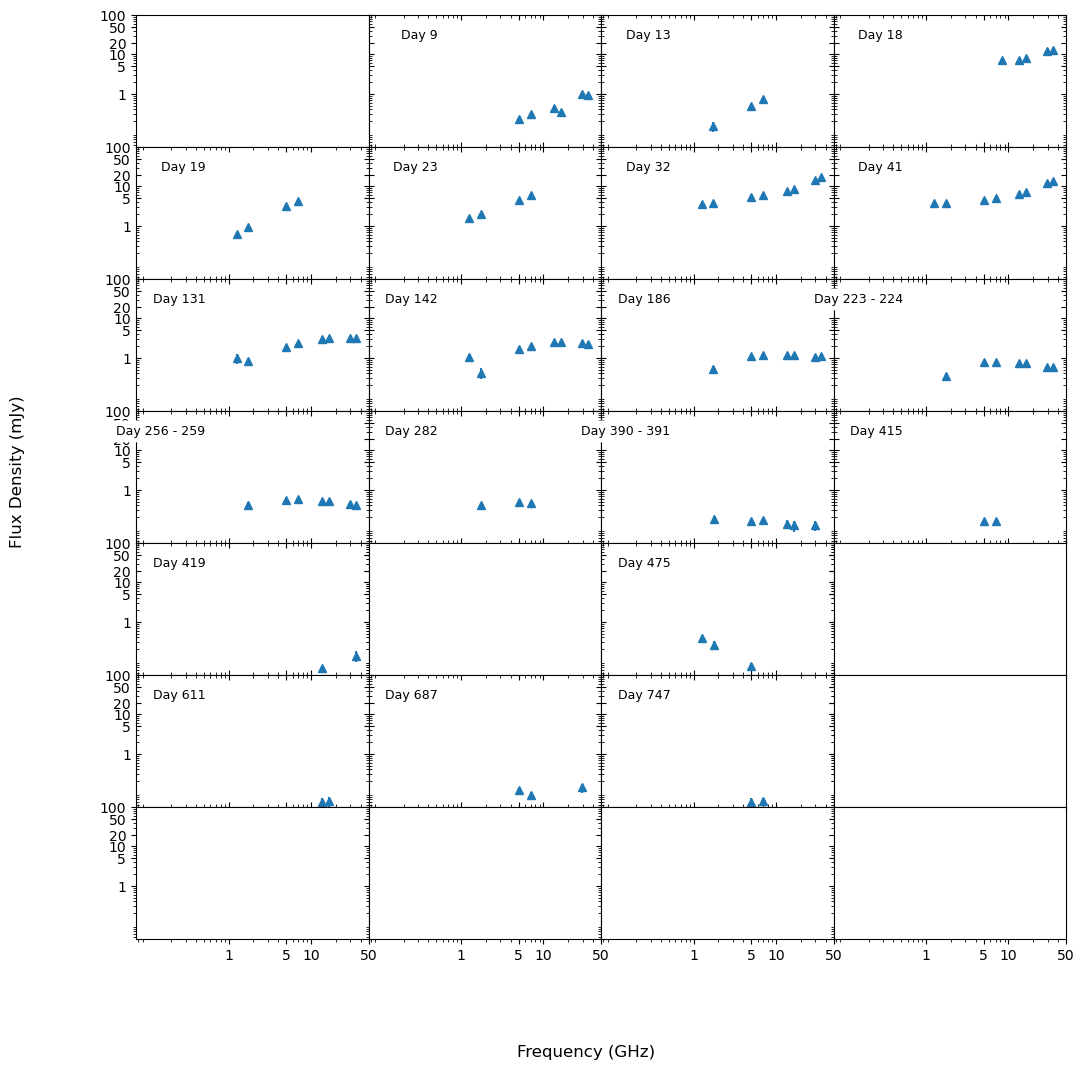

In [26]:
#putting them all in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11,  df12, df14, df16, df17, df19, df20,
       df21, df22, df23, df24, df25, df26]


#the days by the list so they can all be defined
annotations = ['Day 1','Day 9','Day 13','Day 18','Day 19','Day 23','Day 32','Day 41','Day 131',
               'Day 142','Day 186','Day 223 - 224','Day 256 - 259','Day 282','Day 390 - 391',
               'Day 415','Day 419','Day 474','Day 475','Day 528','Day 611','Day 687','Day 747',]

#making the figure (7,4) is the (rows, columns)
fig, ax = plt.subplots(7, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux (mJy)'] > 3 * df['eFlux (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux (mJy)'][mask], yerr=df['eFlux (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Now to sort it out

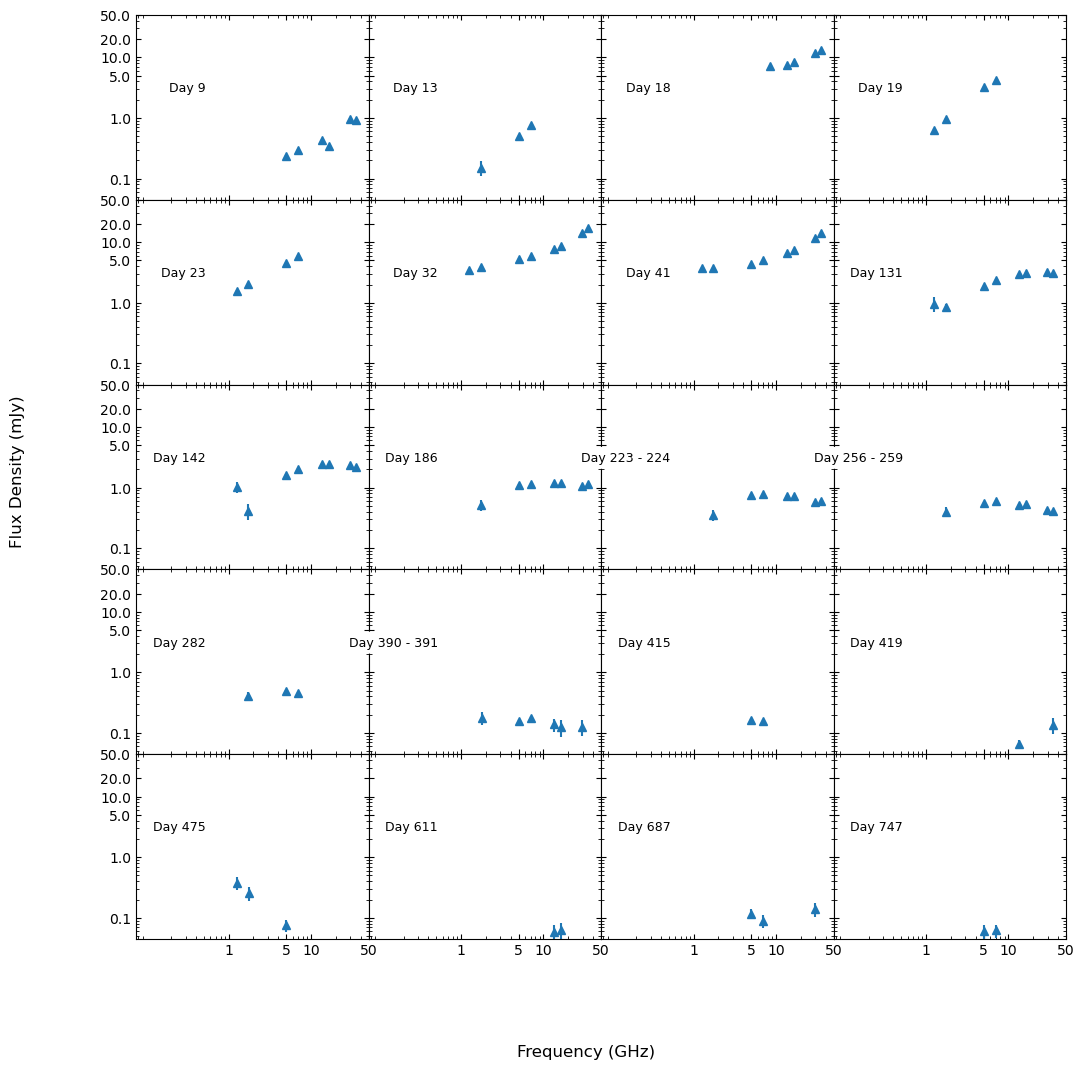

In [27]:
dfs = [ df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12,  df14,  df16, df17,  df19, df20, df22, df24, df25, df26]


#the days by the list so they can all be defined
annotations = ['Day 9','Day 13','Day 18','Day 19','Day 23','Day 32','Day 41','Day 131',
               'Day 142','Day 186','Day 223 - 224','Day 256 - 259','Day 282','Day 390 - 391',
               'Day 415','Day 419','Day 475','Day 611','Day 687','Day 747',]

#making the figure (7,4) is the (rows, columns)
fig, ax = plt.subplots(5, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux (mJy)'] > 3 * df['eFlux (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux (mJy)'][mask], yerr=df['eFlux (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
        ax[row, col].annotate(label, xy=(50, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

# Now to find all of the alphas

In [14]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)


## Day 9 (df2)

In [15]:
#(work for anything with 3+ points)
mask = df2['Flux (mJy)'] > 3 * df2['eFlux (mJy)']  # apply detection threshold

x2 = df2['Freq (GHz)'][mask].values.tolist()
y2 = df2['Flux (mJy)'][mask].values.tolist()
yerr2 = df2['eFlux (mJy)'][mask].values.tolist()


In [16]:
yerr2 = error(yerr2, x2, y2)

In [17]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= -.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)


#weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2, 2))  

# fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2


<PowerLaw1D(amplitude=0.25156341, x_0=5.51726168, alpha=-0.50742601)>

In [18]:
fit2.fit_info

{'nfev': 11,
 'fvec': array([ 25.1221768 , -42.33758679, -17.50984675,  63.73181718,
        -38.12481369, -30.5143415 ]),
 'fjac': array([[-4.62583590e+03,  1.71289480e+02,  1.06961798e+02,
          2.48525293e-01,  5.08801567e-02,  6.21989735e-02],
        [ 1.71289480e+02,  4.02379421e+02,  1.50711631e-13,
          7.54670697e-01,  2.40052124e-01,  3.24225346e-01],
        [ 1.06961798e+02,  1.25342964e-14, -1.05779480e-14,
          7.36405441e-01,  3.63943759e-01,  4.37035932e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-4.74265908e-03, -1.29116887e-04, -4.43506783e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.77830747e+24,  2.06650100e+26, -6.43724171e+09],
        [ 2.06650100e+26,  8.93711087e+27, -2.78394944e+11],
        [-6.43724171e+09, -2.78394944e+11,  1.48484266e-05]]),
 'njev': 4,
 'cov_x': array([[ 4.77830747e+24,  2.06650100e

In [19]:
#taking fvec
fvec2 = np.array([ 25.1221768 , -42.33758679, -17.50984675,  63.73181718,
        -38.12481369, -30.5143415 ])
var2 = np.var(fvec2)

#taking cov_x
cov_x2 = np.array([[ 4.77830747e+24,  2.06650100e+26, -6.43724171e+09],
        [ 2.06650100e+26,  8.93711087e+27, -2.78394944e+11],
        [-6.43724171e+09, -2.78394944e+11,  1.48484266e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(cov_x2*var2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag2[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.1485318779078096


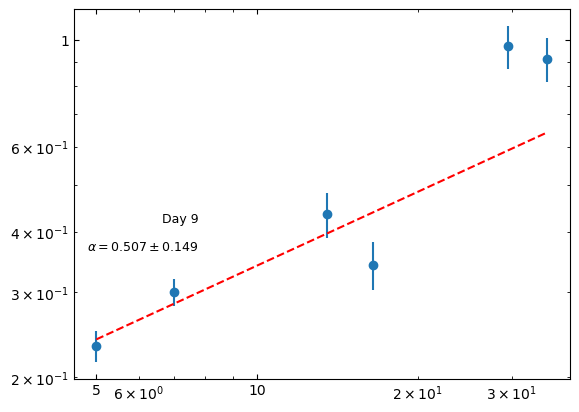

In [29]:
#plotting to check
fig,ax = plt.subplots()
mask = df2['Flux (mJy)'] > 3 * df2['eFlux (mJy)']  # apply detection threshold
mask2 = df2['Flux (mJy)'] < 3 * df2['eFlux (mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux (mJy)'][mask], yerr=yerr2, fmt='o')
    ax.scatter(df2['Freq (GHz)'][mask2], (df2['Flux (mJy)'][mask2] + 3*df2['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 9', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.507 \\pm 0.149}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 13 (df3)

In [31]:
#(work for anything with 3+ points)
mask = df3['Flux (mJy)'] > 3 * df3['eFlux (mJy)']  # apply detection threshold

x3 = df3['Freq (GHz)'][mask].values.tolist()
y3 = df3['Flux (mJy)'][mask].values.tolist()
yerr3 = df3['eFlux (mJy)'][mask].values.tolist()


In [32]:
yerr3 = error(yerr3, x3, y3)

In [33]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)


#weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3, 2))  

# fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=14.23161585, x_0=83.76845146, alpha=-1.18693893)>

In [34]:
fit3.fit_info

{'nfev': 15,
 'fvec': array([-3.70765675,  1.932965  , -2.00029288]),
 'fjac': array([[-2.12724318e+03, -5.48005186e+01,  1.10506232e+01],
        [-5.48005186e+01, -4.00941616e+00,  8.08505982e-01],
        [ 1.10506232e+01,  8.08505982e-01,  2.22044605e-15]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([4.42849928e-05, 3.62850622e-06, 4.63510991e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[8.24752710e+27, 4.08998439e+28, 2.55353737e+10],
        [4.08998439e+28, 2.02824096e+29, 1.26631023e+11],
        [2.55353737e+10, 1.26631023e+11, 4.15831929e-05]])}

In [35]:
#taking fvec
fvec3 = np.array([-3.70765675,  1.932965  , -2.00029288])
var3 = np.var(fvec3)

#taking cov_x
cov_x3 = np.array([[8.24752710e+27, 4.08998439e+28, 2.55353737e+10],
        [4.08998439e+28, 2.02824096e+29, 1.26631023e+11],
        [2.55353737e+10, 1.26631023e+11, 4.15831929e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(cov_x3*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag3[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.015229973039123074


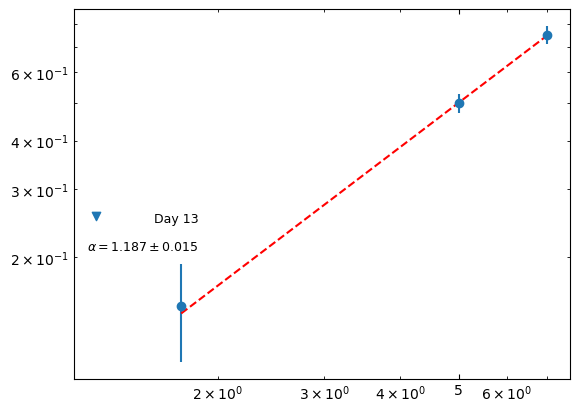

In [43]:
#plotting to check
fig,ax = plt.subplots()
mask = df3['Flux (mJy)'] > 3 * df3['eFlux (mJy)']  # apply detection threshold
mask2 = df3['Flux (mJy)'] < 3 * df3['eFlux (mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux (mJy)'][mask], yerr=yerr3, fmt='o')
    ax.scatter(df3['Freq (GHz)'][mask2], (df3['Flux (mJy)'][mask2] + 3*df3['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 13', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.187 \\pm 0.015}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 18 (df4)

In [38]:
#(work for anything with 3+ points)
mask = df4['Flux (mJy)'] > 3 * df4['eFlux (mJy)']  # apply detection threshold

x4 = df4['Freq (GHz)'][mask].values.tolist()
y4 = df4['Flux (mJy)'][mask].values.tolist()
yerr4 = df4['eFlux (mJy)'][mask].values.tolist()


In [39]:
yerr4 = error(yerr4, x4, y4)

In [40]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)


#weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4, 2))  

# fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)

fit_model_weights4


<PowerLaw1D(amplitude=7.26357518, x_0=9.07381568, alpha=-0.32476157)>

In [41]:
fit4.fit_info

{'nfev': 15,
 'fvec': array([ 1.62693872,  0.72098789, -0.85307784, -1.02474203, -0.37245297]),
 'fjac': array([[ 1.65071916e+01, -7.22794500e-01,  1.87905701e-01,
          5.45251546e-01, -2.51793259e-01],
        [-7.22794500e-01, -8.16461780e+00,  2.12256490e+00,
         -2.51319332e-02,  9.94796187e-01],
        [ 1.87905701e-01,  2.12256490e+00,  4.58715471e-16,
          1.21014343e-01, -9.68114742e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-1.84322616e-05, -4.69204693e-05,  3.10160276e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[3.21191070e+29, 1.23548746e+30, 1.86317112e+13],
        [1.23548746e+30, 4.75240259e+30, 7.16683863e+13],
        [1.86317112e+13, 7.16683863e+13, 4.77944806e-03]]),
 'njev': 7,
 'cov_x': array([[3.21191070e+29, 1.23548746e+30, 1.86317112e+13],
        [1.23548746e+30, 4.75240259e+30, 7.16683863e+13],
        [

In [42]:
#taking fvec
fvec4 = np.array([ 1.62693872,  0.72098789, -0.85307784, -1.02474203, -0.37245297])
var4 = np.var(fvec4)

#taking cov_x
cov_x4 = np.array([[3.21191070e+29, 1.23548746e+30, 1.86317112e+13],
        [1.23548746e+30, 4.75240259e+30, 7.16683863e+13],
        [1.86317112e+13, 7.16683863e+13, 4.77944806e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(cov_x4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag4[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.06969406270703984


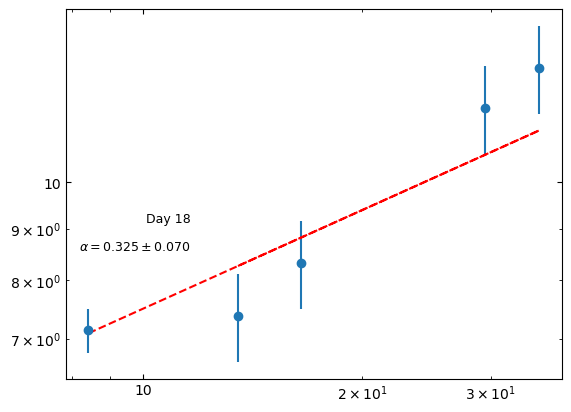

In [44]:
#plotting to check
fig,ax = plt.subplots()
mask = df4['Flux (mJy)'] > 3 * df4['eFlux (mJy)']  # apply detection threshold
mask2 = df4['Flux (mJy)'] < 3 * df4['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux (mJy)'][mask], yerr=yerr4, fmt='o')
    ax.scatter(df4['Freq (GHz)'][mask2], (df4['Flux (mJy)'][mask2] + 3*df4['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 18', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.325 \\pm 0.070}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


---

## Day 19 (df5)

In [45]:
#(work for anything with 3+ points)
mask = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)']  # apply detection threshold

x5 = df5['Freq (GHz)'][mask].values.tolist()
y5 = df5['Flux (mJy)'][mask].values.tolist()
yerr5 = df5['eFlux (mJy)'][mask].values.tolist()


In [29]:
yerr5 = error(yerr5, x5, y5)

In [30]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= .25) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)


#weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5, 2))  

# fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)

fit_model_weights5


<PowerLaw1D(amplitude=0.68800312, x_0=1.32913326, alpha=-1.13129333)>

In [31]:
fit5.fit_info

{'nfev': 18,
 'fvec': array([ 5.23410792, -3.68307904, -5.61289475,  6.83028046]),
 'fjac': array([[-4.63624415e+02,  1.51399934e+02,  2.71495981e+02,
          3.16782119e-01],
        [ 1.51399934e+02, -1.82864401e+02, -8.80174046e-15,
         -7.51802754e-01],
        [ 2.71495981e+02,  1.06837597e-14,  9.37046799e-15,
         -6.92122459e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([1.13752035e-04, 1.36443301e-09, 8.67167932e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[3.90545512e+27, 6.66921233e+27, 3.89645341e+11],
        [6.66921233e+27, 1.13887861e+28, 6.65384042e+11],
        [3.89645341e+11, 6.65384042e+11, 6.87795770e-05]]),
 'njev': 10,
 'cov_x': array([[3.90545512e+27, 6.66921233e+27, 3.89645341e+11],
        [6.66921233e+27, 1.13887861e+28, 6.65384042e+11],
        [3.89645341e+11, 6.65384042e+11, 6.87795770e-05]])}

In [32]:
#taking fvec
fvec5 = np.array([ 5.23410792, -3.68307904, -5.61289475,  6.83028046])
var5 = np.var(fvec5)

#taking cov_x
cov_x5 = np.array([[3.90545512e+27, 6.66921233e+27, 3.89645341e+11],
        [6.66921233e+27, 1.13887861e+28, 6.65384042e+11],
        [3.89645341e+11, 6.65384042e+11, 6.87795770e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(cov_x5*var5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag5[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.044891872552450855


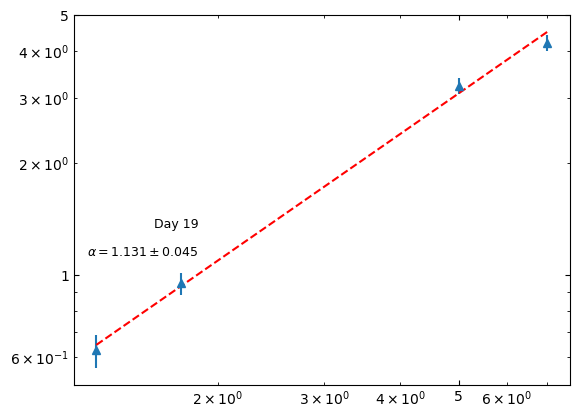

In [33]:
#plotting to check
fig,ax = plt.subplots()
mask = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq (GHz)'][mask], df5['Flux (mJy)'][mask], yerr=yerr5, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 19', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.131 \\pm 0.045}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 23 (df6)

In [34]:
#(work for anything with 3+ points)
mask = df6['Flux (mJy)'] > 3 * df6['eFlux (mJy)']  # apply detection threshold

x6 = df6['Freq (GHz)'][mask].values.tolist()
y6 = df6['Flux (mJy)'][mask].values.tolist()
yerr6 = df6['eFlux (mJy)'][mask].values.tolist()


In [35]:
yerr6 = error(yerr6, x6,y6)

In [36]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6)


#weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6, 2))  

# fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6)

fit_model_weights6


<PowerLaw1D(amplitude=96.31009337, x_0=268.80872904, alpha=-0.76705901)>

In [37]:
fit6.fit_info

{'nfev': 39,
 'fvec': array([-0.15253043,  0.15135875,  0.17672557, -0.25783288]),
 'fjac': array([[-1.27858361e+03, -2.65555965e+00,  7.29851277e-01,
          1.92538786e-01],
        [-2.65555965e+00, -2.91323029e-01,  8.00669210e-02,
          6.97738972e-01],
        [ 7.29851277e-01,  8.00669210e-02,  4.22076438e-17,
          1.64398987e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-2.53311313e-05, -2.77890270e-06, -4.77319487e-03]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[4.24008345e+31, 1.54275191e+32, 6.93381684e+12],
        [1.54275191e+32, 5.61329390e+32, 2.52286524e+13],
        [6.93381684e+12, 2.52286524e+13, 5.25737339e-05]]),
 'njev': 26,
 'cov_x': array([[4.24008345e+31, 1.54275191e+32, 6.93381684e+12],
        [1.54275191e+32, 5.61329390e+32, 2.52286524e+13],
        [6.93381684e+12, 2.52286524e+13, 5.25737339e-05]])}

In [38]:
#taking fvec
fvec6 = np.array([-0.15253043,  0.15135875,  0.17672557, -0.25783288])
var6 = np.var(fvec6)

#taking cov_x
cov_x6 = np.array([[4.24008345e+31, 1.54275191e+32, 6.93381684e+12],
        [1.54275191e+32, 5.61329390e+32, 2.52286524e+13],
        [6.93381684e+12, 2.52286524e+13, 5.25737339e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(cov_x6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag6[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0013670751966013916


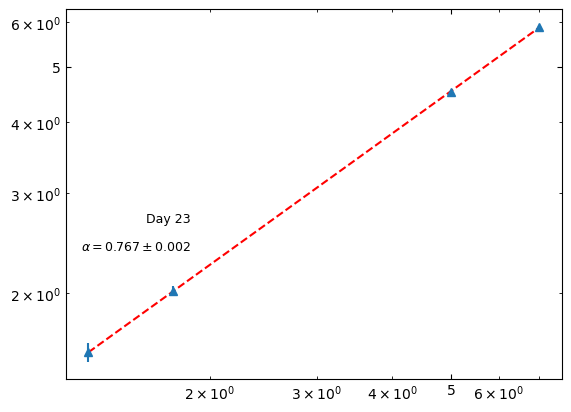

In [39]:
#plotting to check
fig,ax = plt.subplots()
mask = df6['Flux (mJy)'] > 3 * df6['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux (mJy)'][mask], yerr=df6['eFlux (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 23', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.767 \\pm 0.002}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 32 (df7)

In [40]:
#(work for anything with 3+ points)
mask = df7['Flux (mJy)'] > 3 * df7['eFlux (mJy)']  # apply detection threshold

x7 = df7['Freq (GHz)'][mask].values.tolist()
y7 = df7['Flux (mJy)'][mask].values.tolist()
yerr7 = df7['eFlux (mJy)'][mask].values.tolist()


In [41]:
yerr7 = error(yerr7, x7, y7)

In [42]:
PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= 4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)


#weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7, 2))  

# fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7


<PowerLaw1D(amplitude=7.8038097, x_0=16.71620272, alpha=-0.31248019)>

In [43]:
fit7.fit_info

{'nfev': 38,
 'fvec': array([-0.49088803, -1.05823169, -2.44988002, -2.48637064,  0.24364801,
        -0.9883572 ,  1.84113325, -0.5406546 ]),
 'fjac': array([[-3.67840314e+02, -2.14273564e+01,  3.12456586e+00,
         -6.69292734e-03,  7.37648813e-01,  6.04427604e-01,
          2.56757350e-01,  1.56428294e-01],
        [-2.14273564e+01, -7.55662373e+00,  1.10191701e+00,
          7.67981793e-02, -4.54832122e-01, -1.64771163e-01,
          5.48536364e-01,  6.46284513e-01],
        [ 3.12456586e+00,  1.10191701e+00,  5.98839006e-16,
          2.31744887e-02, -7.41583639e-01, -4.63489775e-02,
         -5.56187730e-01, -3.70791820e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-1.50421321e-04, -5.29556994e-05,  1.62667424e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[5.92955387e+28, 4.06631415e+29, 6.79587059e+11],
        [4.06631415e+29, 2.78855900e+

In [44]:
#taking fvec
fvec7 = np.array([-0.49088803, -1.05823169, -2.44988002, -2.48637064,  0.24364801,
        -0.9883572 ,  1.84113325, -0.5406546 ])
var7 = np.var(fvec7)

#taking cov_x
cov_x7 = np.array([[5.92955387e+28, 4.06631415e+29, 6.79587059e+11],
        [4.06631415e+29, 2.78855900e+30, 4.66040876e+12],
        [6.79587059e+11, 4.66040876e+12, 7.46035305e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(cov_x7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag7[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.011372144748195779


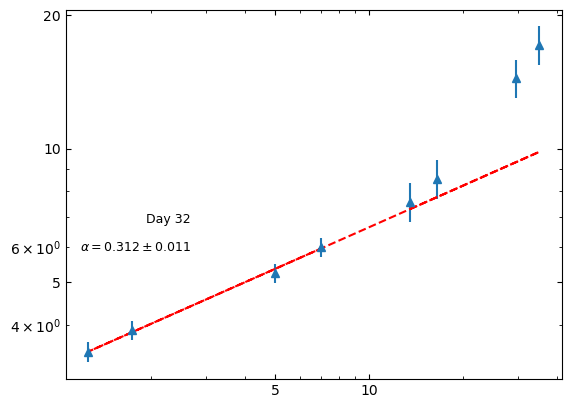

In [45]:
#plotting to check
fig,ax = plt.subplots()
mask = df7['Flux (mJy)'] > 3 * df7['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux (mJy)'][mask], yerr=yerr7, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 32', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.312 \\pm 0.011}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 41 (df8)

In [46]:
#(work for anything with 3+ points)
mask = df8['Flux (mJy)'] > 3 * df8['eFlux (mJy)']  # apply detection threshold

x8 = df8['Freq (GHz)'][mask].values.tolist()
y8 = df8['Flux (mJy)'][mask].values.tolist()
yerr8 = df8['eFlux (mJy)'][mask].values.tolist()


In [47]:
yerr8 = error(yerr8, x8, y8)

In [48]:
PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)


#weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8, 2))  

# fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8


<PowerLaw1D(amplitude=5.38208018, x_0=12.3690617, alpha=-0.17608782)>

In [49]:
fit8.fit_info

{'nfev': 18,
 'fvec': array([-2.51884415, -3.12305972, -3.96558208, -3.83810145, -2.774573  ,
         1.748279  ,  3.46395   , -1.85081329]),
 'fjac': array([[ 3.13707140e+02,  3.16154841e+01, -2.42238165e+00,
          1.10250232e-02, -6.97824050e-01, -6.47573653e-01,
         -2.70545423e-01, -1.41845484e-01],
        [ 3.16154841e+01, -1.45748621e+01,  1.11672743e+00,
          6.44331863e-02, -1.73467017e-01,  2.56181438e-02,
          6.53582433e-01,  7.12829299e-01],
        [-2.42238165e+00,  1.11672743e+00, -3.54376452e-16,
          3.91611456e-02, -3.91611456e-01,  2.44757160e-01,
         -6.26578329e-01,  6.26578329e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([ 2.03741441e-04, -9.53834116e-05,  1.16832632e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[4.67472159e+28, 6.10116851e+29, 1.63682049e+12],
        [6.10116851e+29, 7.96288218e+

In [50]:
#taking fvec
fvec8 = np.array([-2.51885385, -3.12306768, -3.9655854 , -3.83810395, -2.77464744,
         1.74819877,  3.46387809, -1.8508731  ])
var8 = np.var(fvec8)

#taking cov_x
cov_x8 = np.array([[ 8.40083424e+28,  9.97654125e+29, -5.91754135e+11],
        [ 9.97654125e+29,  1.18477966e+31, -7.02746819e+12],
        [-5.91754135e+11, -7.02746819e+12,  6.21423014e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag8 = stand(cov_x8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag8[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.020110388672030733


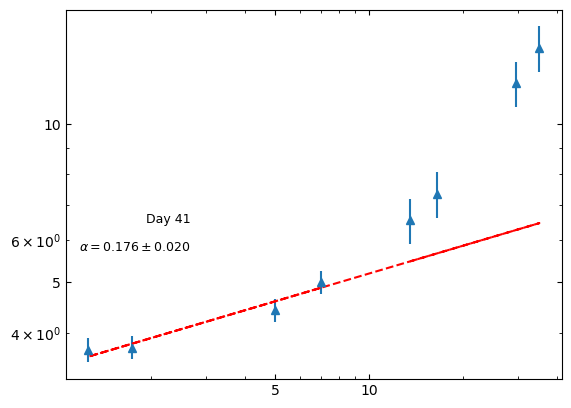

In [51]:
#plotting to check
fig,ax = plt.subplots()
mask = df8['Flux (mJy)'] > 3 * df8['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq (GHz)'][mask], df8['Flux (mJy)'][mask], yerr=yerr8, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 41', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.176 \\pm 0.020}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 131 (df9)

In [52]:
#(work for anything with 3+ points)
mask = df9['Flux (mJy)'] > 3 * df9['eFlux (mJy)']  # apply detection threshold

x9 = df9['Freq (GHz)'][mask].values.tolist()
y9 = df9['Flux (mJy)'][mask].values.tolist()
yerr9 = df9['eFlux (mJy)'][mask].values.tolist()


In [53]:
yerr9 = error(yerr9, x9, y9)

In [54]:
PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)


#weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9, 2))  

# fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9


<PowerLaw1D(amplitude=2.86513367, x_0=12.90369756, alpha=-0.46454496)>

In [55]:
fit9.fit_info

{'nfev': 18,
 'fvec': array([-9.99524347e-01,  1.28451999e+00,  1.03449612e+01,  1.46449244e+01,
         1.68692864e-02,  1.83179162e+01, -2.28521390e+00, -1.28197332e+01]),
 'fjac': array([[ 2.69566583e+02,  8.04635474e+01, -8.32318228e+00,
          1.72539192e-01, -1.09663053e-01, -5.48642753e-01,
         -7.17951113e-01, -3.52319222e-01],
        [ 8.04635474e+01, -5.58656133e+01,  5.77876191e+00,
          5.02921649e-01, -5.53185654e-02, -2.12295994e-01,
          4.01378334e-01,  5.47155194e-01],
        [-8.32318228e+00,  5.77876191e+00, -1.74220136e-15,
         -2.54901195e-01,  1.59313247e-01,  5.09802390e-01,
         -2.54901195e-01,  7.64703585e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([9.63991143e-04, 8.60601845e-04, 4.11241595e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[3.52520001e+27, 3.40795249e+28, 2.45943897e+11],
        

In [56]:
#taking fvec
fvec9 = np.array([-9.99524347e-01,  1.28451999e+00,  1.03449612e+01,  1.46449244e+01,
         1.68692864e-02,  1.83179162e+01, -2.28521390e+00, -1.28197332e+01])
var9 = np.var(fvec9)

#taking cov_x
cov_x9 = np.array([[3.52520001e+27, 3.40795249e+28, 2.45943897e+11],
        [3.40795249e+28, 3.29460461e+29, 2.37763847e+12],
        [2.45943897e+11, 2.37763847e+12, 5.94685164e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag9 = stand(cov_x9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag9[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.07354816632897618


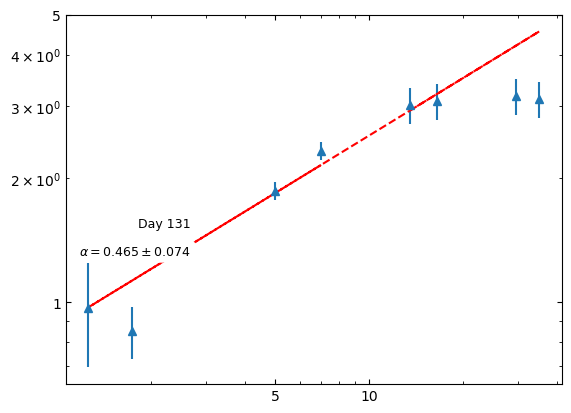

In [57]:
#plotting to check
fig,ax = plt.subplots()
mask = df9['Flux (mJy)'] > 3 * df9['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq (GHz)'][mask], df9['Flux (mJy)'][mask], yerr=yerr9, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 131', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.465 \\pm 0.074}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 142 (df10)

In [58]:
#(work for anything with 3+ points)
mask = df10['Flux (mJy)'] > 3 * df10['eFlux (mJy)']  # apply detection threshold

x10 = df10['Freq (GHz)'][mask].values.tolist()
y10 = df10['Flux (mJy)'][mask].values.tolist()
yerr10 = df10['eFlux (mJy)'][mask].values.tolist()


In [59]:
yerr10 = error(yerr10, x10, y10)

In [60]:
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= 4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)


#weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10, 2))  

# fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10


<PowerLaw1D(amplitude=2.484453, x_0=16.48725648, alpha=-0.37048454)>

In [61]:
fit10.fit_info

{'nfev': 35,
 'fvec': array([ -2.28651914,   0.16549462,  12.72121007,  22.37214669,
         -1.42648817,  41.2821875 ,  -5.78326984, -20.23732543]),
 'fjac': array([[-3.55471377e+02, -1.08029889e+02,  6.03109830e+00,
         -1.42641557e-01,  1.32298702e-01,  4.25407615e-01,
          7.71290241e-01,  4.21703902e-01],
        [-1.08029889e+02, -6.59945126e+01,  3.68434510e+00,
          6.72181863e-01, -1.30865149e-01, -3.69316120e-01,
         -1.17278596e-02,  2.94548960e-01],
        [ 6.03109830e+00,  3.68434510e+00, -7.08854796e-16,
          0.00000000e+00, -7.83110328e-02,  6.26488263e-01,
          3.32821889e-01,  6.26488263e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-6.83263026e-04,  6.13791008e-04, -1.70168089e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.20283727e+27,  1.11106102e+29, -5.24269552e+11],
        [ 1.11106102e+29, 

In [62]:
#taking fvec
fvec10 = np.array([ -2.28651914,   0.16549462,  12.72121007,  22.37214669,
         -1.42648817,  41.2821875 ,  -5.78326984, -20.23732543])
var10 = np.var(fvec10)

#taking cov_x
cov_x10 = np.array([[ 6.20283727e+27,  1.11106102e+29, -5.24269552e+11],
        [ 1.11106102e+29,  1.99014828e+30, -9.39079067e+12],
        [-5.24269552e+11, -9.39079067e+12,  7.34318554e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag10 = stand(cov_x10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag10[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.1527807854648782


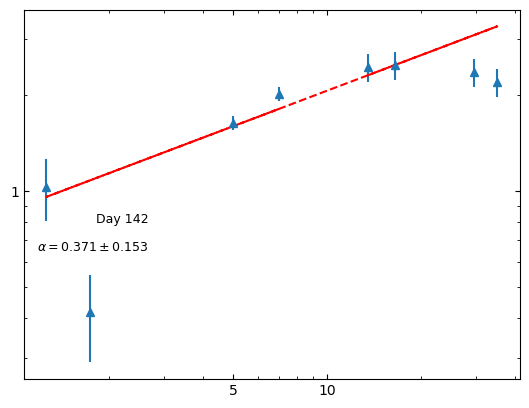

In [63]:
#plotting to check
fig,ax = plt.subplots()
mask = df10['Flux (mJy)'] > 3 * df10['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq (GHz)'][mask], df10['Flux (mJy)'][mask], yerr=yerr10, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 142', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.371 \\pm 0.153}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 186 (df11)

In [64]:
#(work for anything with 3+ points)
mask = df11['Flux (mJy)'] > 3 * df11['eFlux (mJy)']  # apply detection threshold

x11 = df11['Freq (GHz)'][mask].values.tolist()
y11 = df11['Flux (mJy)'][mask].values.tolist()
yerr11 = df11['eFlux (mJy)'][mask].values.tolist()


In [65]:
yerr11 = error(yerr11, x11, y11)

In [66]:
PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)


#weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11, 2))  

# fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11


<PowerLaw1D(amplitude=1.27607933, x_0=36.23670821, alpha=-0.0780053)>

In [67]:
fit11.fit_info

{'nfev': 16,
 'fvec': array([ -1.27159239,  -0.46760469,  15.66431115,  11.00218958,
         40.98380208,  -7.78419232, -11.60112318]),
 'fjac': array([[-8.37516102e+02, -3.53581762e+02,  9.71276504e-01,
          3.93239429e-03,  3.01651366e-01,  7.29288108e-01,
          6.01199349e-01],
        [-3.53581762e+02, -1.24996458e+02,  3.43360817e-01,
          5.82639415e-01, -3.97175436e-01, -2.88085664e-01,
          8.86766345e-02],
        [ 9.71276504e-01,  3.43360817e-01,  2.19015280e-16,
         -0.00000000e+00, -2.53457893e-01, -8.23738151e-01,
         -4.91074667e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-1.00626494e-04, -4.24804304e-04, -2.69071609e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.57310324e+26, 5.72669691e+28, 2.35898893e+10],
        [5.72669691e+28, 2.08473651e+31, 8.58762111e+12],
        [2.35898893e+10, 8.58762111e

In [68]:
#taking fvec
fvec11 = np.array([ -1.27159239,  -0.46760469,  15.66431115,  11.00218958,
         40.98380208,  -7.78419232, -11.60112318])
var11 = np.var(fvec11)

#taking cov_x
cov_x11 = np.array([[1.57310324e+26, 5.72669691e+28, 2.35898893e+10],
        [5.72669691e+28, 2.08473651e+31, 8.58762111e+12],
        [2.35898893e+10, 8.58762111e+12, 1.63708340e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag11 = stand(cov_x11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag11[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.06725120717135392


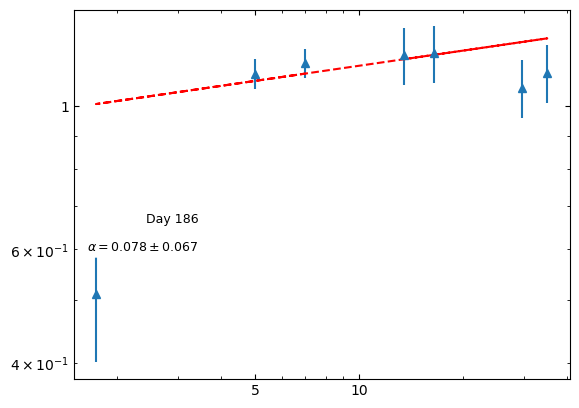

In [69]:
#plotting to check
fig,ax = plt.subplots()
mask = df11['Flux (mJy)'] > 3 * df11['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq (GHz)'][mask], df11['Flux (mJy)'][mask], yerr=yerr11, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 186', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.078 \\pm 0.067}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 223 (df12)

In [70]:
#(work for anything with 3+ points)
mask = df12['Flux (mJy)'] > 3 * df12['eFlux (mJy)']  # apply detection threshold

x12 = df12['Freq (GHz)'][mask].values.tolist()
y12 = df12['Flux (mJy)'][mask].values.tolist()
yerr12 = df12['eFlux (mJy)'][mask].values.tolist()


In [71]:
yerr12 = error(yerr12, x12, y12)

In [72]:
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)


#weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12, 2))  

# fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12


<PowerLaw1D(amplitude=3.33276744, x_0=436.22286528, alpha=-0.34169508)>

In [73]:
fit12.fit_info

{'nfev': 21,
 'fvec': array([ 28.81821532, -25.45896822,  17.68606807]),
 'fjac': array([[-2.82543035e+03, -1.96039589e+02,  5.11775030e-01],
        [-1.96039589e+02, -1.09646757e+01,  2.86240512e-02],
        [ 5.11775030e-01,  2.86240512e-02, -4.85722573e-17]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-3.36950113e-04, -1.42398203e-03, -4.23254722e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 14,
 'cov_x': array([[ 2.88864415e+27,  1.10651864e+30, -6.18803376e+10],
        [ 1.10651864e+30,  4.23860968e+32, -2.37037668e+13],
        [-6.18803376e+10, -2.37037668e+13,  4.14938771e-05]])}

In [74]:
#taking fvec
fvec12 = np.array([ 28.81821532, -25.45896822,  17.68606807])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 2.88864415e+27,  1.10651864e+30, -6.18803376e+10],
        [ 1.10651864e+30,  4.23860968e+32, -2.37037668e+13],
        [-6.18803376e+10, -2.37037668e+13,  4.14938771e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.15078469310822618


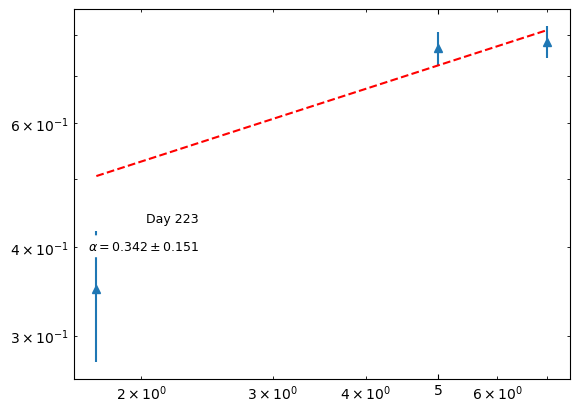

In [75]:
#plotting to check
fig,ax = plt.subplots()
mask = df12['Flux (mJy)'] > 3 * df12['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq (GHz)'][mask], df12['Flux (mJy)'][mask], yerr=yerr12, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 223', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.342 \\pm 0.151}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 224 (df13)

In [76]:
#(work for anything with 3+ points)
mask = df13['Flux (mJy)'] > 3 * df13['eFlux (mJy)']  # apply detection threshold

x13 = df13['Freq (GHz)'][mask].values.tolist()
y13 = df13['Flux (mJy)'][mask].values.tolist()
yerr13 = df13['eFlux (mJy)'][mask].values.tolist()


In [77]:
yerr13 = error(yerr13, x13, y13)

In [78]:
PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= .3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit13 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model13 = fit13(PL13, x13, y13)


#weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13, 2))  

# fit the data using the uncertainties as weights
fit_model_weights13 = fit13(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=0.67622958, x_0=18.81222952, alpha=0.28234448)>

In [79]:
fit13.fit_info

{'nfev': 12,
 'fvec': array([ 0.83141556, -2.88639415,  6.77505385, -5.98329706]),
 'fjac': array([[-4.12690649e+02,  5.05536183e+01, -4.19308829e+00,
          4.77036146e-01],
        [ 5.05536183e+01, -1.07668115e+02, -4.11015703e-16,
         -7.49175148e-01],
        [-4.19308829e+00, -6.15750590e-16,  1.23619028e-16,
          4.30668569e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([ 9.06906277e-04, -4.13562251e-09, -7.35068476e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.75535400e+27, -6.64873056e+29,  3.80238825e+12],
        [-6.64873056e+29,  6.54379001e+31, -3.74237308e+14],
        [ 3.80238825e+12, -3.74237308e+14,  2.22651473e-03]]),
 'njev': 5,
 'cov_x': array([[ 6.75535400e+27, -6.64873056e+29,  3.80238825e+12],
        [-6.64873056e+29,  6.54379001e+31, -3.74237308e+14],
        [ 3.80238825e+12, -3.74237308e+14,  2.22651473e-03

In [80]:
#taking fvec
fvec13 = np.array([ 0.83141556, -2.88639415,  6.77505385, -5.98329706])
var13 = np.var(fvec13)

#taking cov_x
cov_x13 = np.array([[ 6.75535400e+27, -6.64873056e+29,  3.80238825e+12],
        [-6.64873056e+29,  6.54379001e+31, -3.74237308e+14],
        [ 3.80238825e+12, -3.74237308e+14,  2.22651473e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag13 = stand(cov_x13*var13) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag13[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.2242261544475407


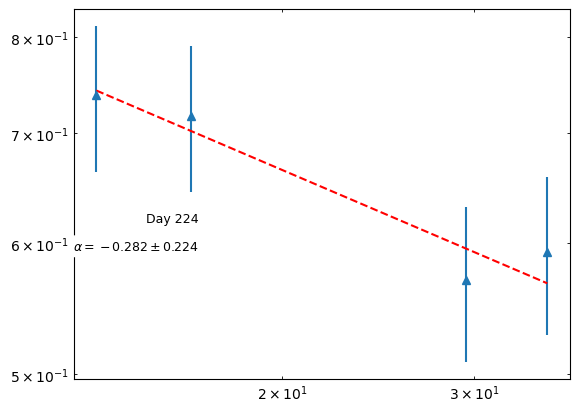

In [81]:
#plotting to check
fig,ax = plt.subplots()
mask = df13['Flux (mJy)'] > 3 * df13['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq (GHz)'][mask], df13['Flux (mJy)'][mask], yerr=yerr13, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 224', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.282 \\pm 0.224}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 256 (df14)

In [82]:
#(work for anything with 3+ points)
mask = df14['Flux (mJy)'] > 3 * df14['eFlux (mJy)']  # apply detection threshold

x14 = df14['Freq (GHz)'][mask].values.tolist()
y14 = df14['Flux (mJy)'][mask].values.tolist()
yerr14 = df14['eFlux (mJy)'][mask].values.tolist()


In [83]:
yerr14 = error(yerr14, x14, y14)

In [84]:
PL14 =  PowerLaw1D(amplitude = y14[0], x_0= x14[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit14 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model14 = fit14(PL14, x14, y14)


#weight is 1/error^2
y_weight14 = 1/ (np.power(yerr14, 2))  

# fit the data using the uncertainties as weights
fit_model_weights14 = fit14(PL14, x14, y14, weights=y_weight14)

fit_model_weights14


<PowerLaw1D(amplitude=1.26486486, x_0=350.96294628, alpha=-0.19364973)>

In [85]:
fit14.fit_info

{'nfev': 46,
 'fvec': array([ 7.25140642, -3.61082977,  3.01930498]),
 'fjac': array([[-3.00289583e+03, -5.76564025e+02,  4.02538489e-01],
        [-5.76564025e+02,  2.77921203e+01, -1.94035660e-02],
        [ 4.02538489e-01, -1.94035660e-02, -4.51028104e-17]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-3.33071257e-04, -2.93146633e-05,  8.64506734e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 29,
 'cov_x': array([[2.39614191e+26, 3.43204255e+29, 2.70443896e+10],
        [3.43204255e+29, 4.91578401e+32, 3.87362266e+13],
        [2.70443896e+10, 3.87362266e+13, 5.08910744e-05]])}

In [86]:
#taking fvec
fvec14 = np.array([ 7.25140642, -3.61082977,  3.01930498])
var14 = np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[2.39614191e+26, 3.43204255e+29, 2.70443896e+10],
        [3.43204255e+29, 4.91578401e+32, 3.87362266e+13],
        [2.70443896e+10, 3.87362266e+13, 5.08910744e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag14[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03189068773160555


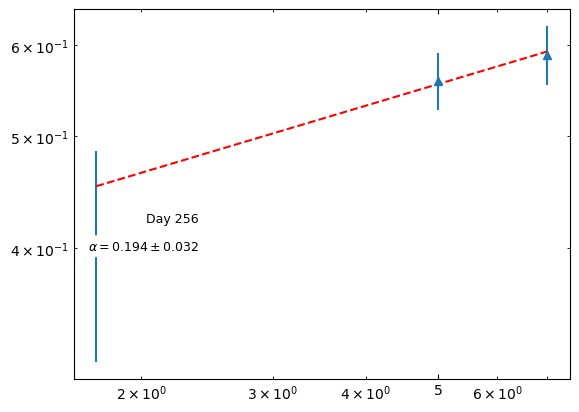

In [87]:
#plotting to check
fig,ax = plt.subplots()
mask = df14['Flux (mJy)'] > 3 * df14['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df14['Freq (GHz)'][mask], df14['Flux (mJy)'][mask], yerr=yerr14, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 256', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.194 \\pm 0.032}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 259 (df15)

In [88]:
#(work for anything with 3+ points)
mask = df15['Flux (mJy)'] > 3 * df15['eFlux (mJy)']  # apply detection threshold

x15 = df15['Freq (GHz)'][mask].values.tolist()
y15 = df15['Flux (mJy)'][mask].values.tolist()
yerr15 = df15['eFlux (mJy)'][mask].values.tolist()


In [89]:
yerr15 = error(yerr15, x15, y15)

In [90]:
PL15 =  PowerLaw1D(amplitude = y15[0], x_0= x15[0], alpha= -.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit15 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model15 = fit15(PL15, x15, y15)


#weight is 1/error^2
y_weight15 = 1/ (np.power(yerr15, 2))  

# fit the data using the uncertainties as weights
fit_model_weights15 = fit15(PL15, x15, y15, weights=y_weight15)

fit_model_weights15


<PowerLaw1D(amplitude=0.53069618, x_0=13.94094419, alpha=0.27339853)>

In [91]:
fit15.fit_info

{'nfev': 13,
 'fvec': array([ 5.05561275, -7.55752418,  2.52191158, -0.51796403]),
 'fjac': array([[-6.48734582e+02,  1.38903453e+02, -6.74492455e+00,
          4.49177375e-01],
        [ 1.38903453e+02, -1.35186208e+02, -6.32250819e-16,
         -7.66813411e-01],
        [-6.74492455e+00, -9.03093565e-16,  4.12914211e-16,
         -4.43605034e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([ 9.42593930e-04, -4.19251840e-07,  2.12354971e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.34016316e+26, -6.09804167e+28,  4.07371600e+11],
        [-6.09804167e+28,  5.86516644e+30, -3.91814679e+13],
        [ 4.07371600e+11, -3.91814679e+13,  3.16465241e-04]]),
 'njev': 7,
 'cov_x': array([[ 6.34016316e+26, -6.09804167e+28,  4.07371600e+11],
        [-6.09804167e+28,  5.86516644e+30, -3.91814679e+13],
        [ 4.07371600e+11, -3.91814679e+13,  3.16465241e-04

In [92]:
#taking fvec
fvec15 = np.array([ 5.05561275, -7.55752418,  2.52191158, -0.51796403])
var15 = np.var(fvec15)

#taking cov_x
cov_x15 = np.array([[ 6.34016316e+26, -6.09804167e+28,  4.07371600e+11],
        [-6.09804167e+28,  5.86516644e+30, -3.91814679e+13],
        [ 4.07371600e+11, -3.91814679e+13,  3.16465241e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag15 = stand(cov_x15*var15) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag15[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08402663853255936


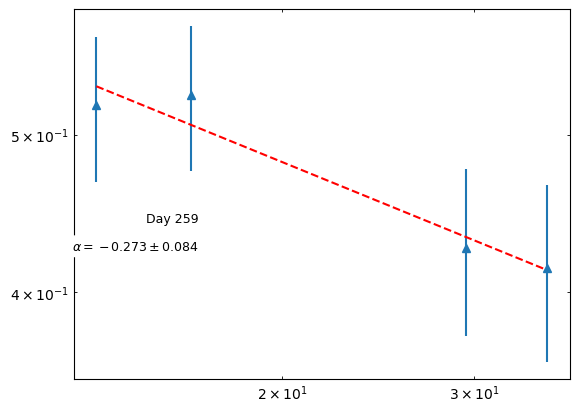

In [93]:
#plotting to check
fig,ax = plt.subplots()
mask = df15['Flux (mJy)'] > 3 * df15['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df15['Freq (GHz)'][mask], df15['Flux (mJy)'][mask], yerr=yerr15, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 259', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df15['Freq (GHz)'][mask], fit_model_weights15(df15['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.273 \\pm 0.084}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 282 (df16)

In [94]:
#(work for anything with 3+ points)
mask = df16['Flux (mJy)'] > 3 * df16['eFlux (mJy)']  # apply detection threshold

x16 = df16['Freq (GHz)'][mask].values.tolist()
y16 = df16['Flux (mJy)'][mask].values.tolist()
yerr16 = df16['eFlux (mJy)'][mask].values.tolist()


In [95]:
yerr16 = error(yerr16, x16, y16)

In [96]:
PL16 =  PowerLaw1D(amplitude = y16[0], x_0= x16[0], alpha= 2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit16 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model16 = fit16(PL16, x16, y16)


#weight is 1/error^2
y_weight16 = 1/ (np.power(yerr16, 2))  

# fit the data using the uncertainties as weights
fit_model_weights16 = fit16(PL16, x16, y16, weights=y_weight16)

fit_model_weights16


<PowerLaw1D(amplitude=0.51258501, x_0=1.99264511, alpha=0.07633797)>

In [97]:
fit16.fit_info

{'nfev': 18,
 'fvec': array([ 24.09984862, -18.4987269 ,  12.7845734 ]),
 'fjac': array([[-1.81951781e+03,  1.01165514e+03, -3.57299861e+01],
        [ 1.01165514e+03, -2.10392132e+02,  2.10432628e-14],
        [-3.57299861e+01, -3.16809985e-16, -3.53855986e-15]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([8.91622053e-04, 5.63217094e-04, 3.29613549e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 11,
 'cov_x': array([[ 3.07964020e+25, -1.56827942e+27,  2.36152642e+09],
        [-1.56827942e+27,  7.98632363e+28, -1.20258635e+11],
        [ 2.36152642e+09, -1.20258635e+11,  2.27723752e-05]])}

In [98]:
#taking fvec
fvec16 = np.array([ 24.09984862, -18.4987269 ,  12.7845734 ])
var16 = np.var(fvec16)

#taking cov_x
cov_x16 = np.array([[ 3.07964020e+25, -1.56827942e+27,  2.36152642e+09],
        [-1.56827942e+27,  7.98632363e+28, -1.20258635e+11],
        [ 2.36152642e+09, -1.20258635e+11,  2.27723752e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag16 = stand(cov_x16*var16) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag16[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0859750426332966


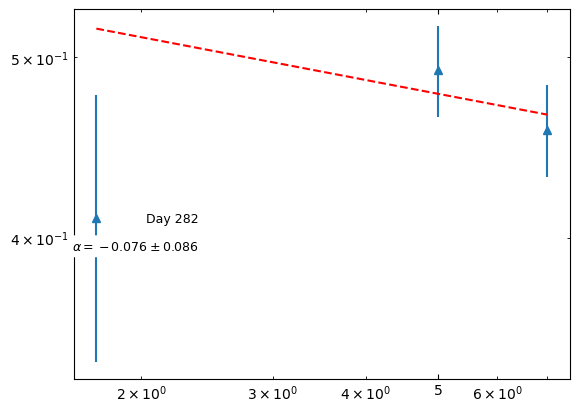

In [99]:
#plotting to check
fig,ax = plt.subplots()
mask = df16['Flux (mJy)'] > 3 * df16['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df16['Freq (GHz)'][mask], df16['Flux (mJy)'][mask], yerr=yerr16, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 282', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.076 \\pm 0.086}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 390 (df17)

In [100]:
#(work for anything with 3+ points)
mask = df17['Flux (mJy)'] > 3 * df17['eFlux (mJy)']  # apply detection threshold

x17 = df17['Freq (GHz)'][mask].values.tolist()
y17 = df17['Flux (mJy)'][mask].values.tolist()
yerr17 = df17['eFlux (mJy)'][mask].values.tolist()


In [101]:
yerr17 = error(yerr17, x17, y17)

In [102]:
PL17 =  PowerLaw1D(amplitude = y17[0], x_0= x17[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit17 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model17 = fit17(PL17, x17, y17)


#weight is 1/error^2
y_weight17 = 1/ (np.power(yerr17, 2))  

# fit the data using the uncertainties as weights
fit_model_weights17 = fit17(PL17, x17, y17, weights=y_weight17)

fit_model_weights17


<PowerLaw1D(amplitude=0.45025305, x_0=345.92933588, alpha=-0.24415424)>

In [103]:
fit17.fit_info

{'nfev': 60,
 'fvec': array([-26.13107624,  11.15470532,  -8.03521715]),
 'fjac': array([[-3.48241250e+03, -1.89358602e+03,  5.99901127e-01],
        [-1.89358602e+03,  8.78598887e+01, -2.78346195e-02],
        [ 5.99901127e-01, -2.78346195e-02, -2.08166817e-17]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([ 3.14633849e-04,  1.81463524e-03, -2.95266881e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 42,
 'cov_x': array([[2.31614783e+26, 7.31091334e+29, 6.07247806e+11],
        [7.31091334e+29, 2.30768749e+33, 1.91677579e+15],
        [6.07247806e+11, 1.91677579e+15, 1.63046781e-03]])}

In [104]:
#taking fvec
fvec17 = np.array([-26.13107624,  11.15470532,  -8.03521715])
var17 = np.var(fvec17)

#taking cov_x
cov_x17 = np.array([[2.31614783e+26, 7.31091334e+29, 6.07247806e+11],
        [7.31091334e+29, 2.30768749e+33, 1.91677579e+15],
        [6.07247806e+11, 1.91677579e+15, 1.63046781e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag17 = stand(cov_x17*var17) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag17[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.6147323268193591


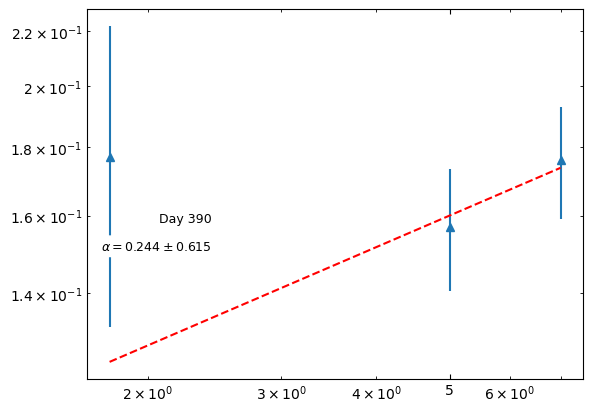

In [105]:
#plotting to check
fig,ax = plt.subplots()
mask = df17['Flux (mJy)'] > 3 * df17['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df17['Freq (GHz)'][mask], df17['Flux (mJy)'][mask], yerr=yerr17, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 390', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.244 \\pm 0.615}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 391 (df18)

In [106]:
#(work for anything with 3+ points)
mask = df18['Flux (mJy)'] > 3 * df18['eFlux (mJy)']  # apply detection threshold

x18 = df18['Freq (GHz)'][mask].values.tolist()
y18 = df18['Flux (mJy)'][mask].values.tolist()
yerr18 = df18['eFlux (mJy)'][mask].values.tolist()


In [107]:
yerr18 = error(yerr18, x18, y18)

In [108]:
PL18 =  PowerLaw1D(amplitude = y18[0], x_0= x18[0], alpha= -.25) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit18 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model18 = fit18(PL18, x18, y18)


#weight is 1/error^2
y_weight18 = 1/ (np.power(yerr18, 2))  

# fit the data using the uncertainties as weights
fit_model_weights18 = fit18(PL18, x18, y18, weights=y_weight18)

fit_model_weights18


<PowerLaw1D(amplitude=0.13540425, x_0=13.74647606, alpha=0.11155441)>

In [109]:
fit18.fit_info

{'nfev': 9,
 'fvec': array([-2.46231995,  4.38968663, -1.06602685]),
 'fjac': array([[-1.10315096e+03,  3.85805623e+01, -1.21092161e+00],
        [ 3.85805623e+01,  4.94847402e+01, -8.80156663e-15],
        [-1.21092161e+00, -1.22759062e-16,  2.15777596e-16]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([ 2.19433161e-04, -2.72061540e-05,  5.14478197e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[ 2.58791177e+25, -2.35759055e+28, -5.84858287e+10],
        [-2.35759055e+28,  2.14776766e+31,  5.32806562e+13],
        [-5.84858287e+10,  5.32806562e+13,  5.40549131e-04]])}

In [110]:
#taking fvec
fvec18 = np.array([-2.46231995,  4.38968663, -1.06602685])
var18 = np.var(fvec18)

#taking cov_x
cov_x18 = np.array([[ 2.58791177e+25, -2.35759055e+28, -5.84858287e+10],
        [-2.35759055e+28,  2.14776766e+31,  5.32806562e+13],
        [-5.84858287e+10,  5.32806562e+13,  5.40549131e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag18 = stand(cov_x18*var18) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag18[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.06873620564078589


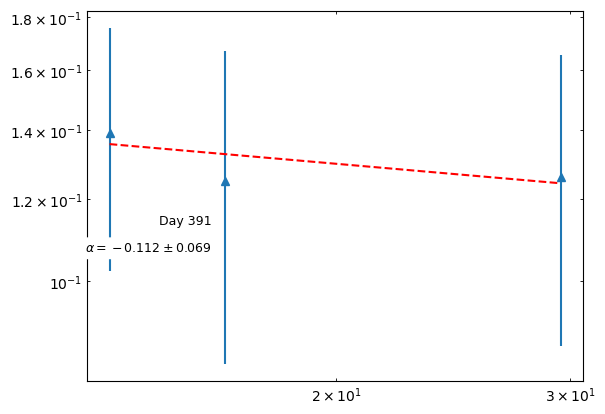

In [111]:
#plotting to check
fig,ax = plt.subplots()
mask = df18['Flux (mJy)'] > 3 * df18['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df18['Freq (GHz)'][mask], df18['Flux (mJy)'][mask], yerr=yerr18, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 391', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df18['Freq (GHz)'][mask], fit_model_weights18(df18['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.112 \\pm 0.069}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 415 (df19)

In [112]:
#(work for anything with 3+ points)
mask = df19['Flux (mJy)'] > 3 * df19['eFlux (mJy)']  # apply detection threshold

x19 = df19['Freq (GHz)'][mask].values.tolist()
y19 = df19['Flux (mJy)'][mask].values.tolist()
yerr19 = df19['eFlux (mJy)'][mask].values.tolist()


In [113]:
yerr19 = error(yerr19, x19, y19)

In [114]:
PL19 =  PowerLaw1D(amplitude = y19[0], x_0= x19[0], alpha= 2,
                  bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit19 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model19 = fit19(PL19, x19, y19)


#weight is 1/error^2
y_weight19 = 1/ (np.power(yerr19, 2))  

# fit the data using the uncertainties as weights
fit_model_weights19 = fit19(PL19, x19, y19, weights=y_weight19)

fit_model_weights19


<PowerLaw1D(amplitude=0.165, x_0=5., alpha=0.14770808)>

In [115]:
fit19.fit_info

{'nfev': 6,
 'fvec': array([0.00000000e+00, 1.25160189e-12]),
 'fjac': array([[-5.39385970e+03,  6.62904269e-01],
        [ 1.31593506e+02,  1.48625693e+02]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-2.5504151e-05, -2.8805161e-05]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[6.13169025e-08, 1.10445246e-06],
        [1.10445246e-06, 4.52701796e-05]])}

In [116]:
#taking fvec
fvec19 = np.array([0.00000000e+00, 1.62876868e-12])
var19 = np.var(fvec19)

#taking cov_x
cov_x19 = np.array([[6.13169025e-08, 1.10445246e-06],
        [1.10445246e-06, 4.52701796e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag19 = stand(cov_x19)#*var19) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag19[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.006728311794202168


In [117]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

In [118]:
alpha_err19 = two_points(y19,x19,yerr19)
print(alpha_err19)

(-0.14770808150873518, 0.41916438432605374)


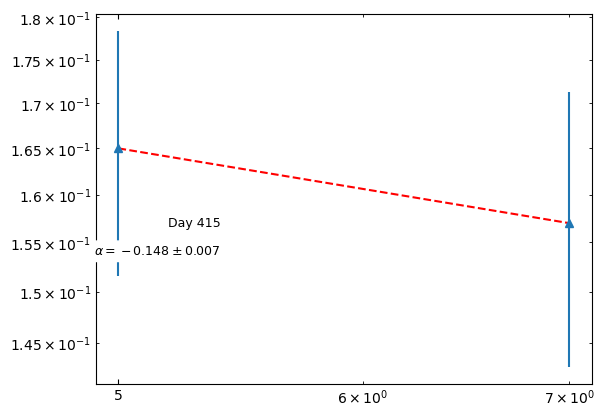

In [119]:
#plotting to check
fig,ax = plt.subplots()
mask = df19['Flux (mJy)'] > 3 * df19['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df19['Freq (GHz)'][mask], df19['Flux (mJy)'][mask], yerr=df19['eFlux (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 415', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.148 \\pm 0.007}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 419 (df20)

In [120]:
#(work for anything with 3+ points)
mask = df20['Flux (mJy)'] > 3 * df20['eFlux (mJy)']  # apply detection threshold

x20 = df20['Freq (GHz)'][mask].values.tolist()
y20 = df20['Flux (mJy)'][mask].values.tolist()
yerr20 = df20['eFlux (mJy)'][mask].values.tolist()


In [121]:
yerr20 = error(yerr20, x20, y20)

In [122]:
PL20 =  PowerLaw1D(amplitude = y20[0], x_0= x20[0], alpha= -1, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit20 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model20 = fit20(PL20, x20, y20)


#weight is 1/error^2
y_weight20 = 1/ (np.power(yerr20, 2))  

# fit the data using the uncertainties as weights
fit_model_weights20 = fit20(PL20, x20, y20, weights=y_weight20)

fit_model_weights20


<PowerLaw1D(amplitude=0.0657, x_0=13.5, alpha=-0.7714014)>

In [123]:
fit20.fit_info

{'nfev': 5,
 'fvec': array([0.0000000e+00, 2.8320571e-14]),
 'fjac': array([[-5.87332745e+03,  1.81130993e-01],
        [ 1.20606943e+01,  6.54840892e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-3.70727994e-07, -2.01288454e-06]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 4,
 'cov_x': array([[2.99722310e-08, 4.78868766e-07],
        [4.78868766e-07, 2.33199931e-04]])}

In [124]:
#taking fvec
fvec20 = np.array([0.00000000e+00, 3.13195881e-14])
var20 = np.var(fvec20)

#taking cov_x
cov_x20 = np.array([[2.99722310e-08, 4.78868766e-07],
        [4.78868766e-07, 2.33199931e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag20 = stand(cov_x20)#*var20) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag20[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.015270885075855951


In [125]:
alpha_err20 = two_points(y20,x20,yerr20)
print(alpha_err20)

(0.7714013951028592, 0.39907800488658196)


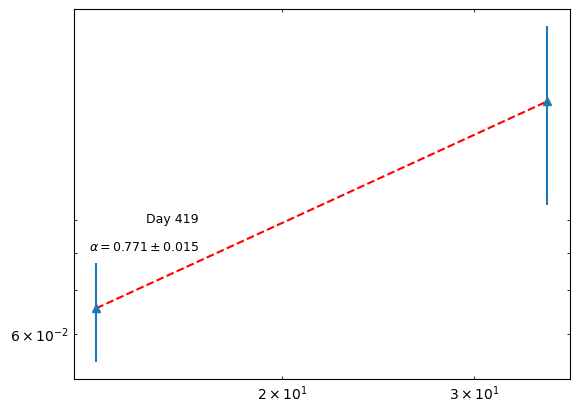

In [126]:
#plotting to check
fig,ax = plt.subplots()
mask = df20['Flux (mJy)'] > 3 * df20['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df20['Freq (GHz)'][mask], df20['Flux (mJy)'][mask], yerr=df20['eFlux (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 419', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df20['Freq (GHz)'][mask], fit_model_weights20(df20['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.771 \\pm 0.015}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 475 (df22)

In [127]:
#(work for anything with 3+ points)
mask = df22['Flux (mJy)'] > 3 * df22['eFlux (mJy)']  # apply detection threshold

x22 = df22['Freq (GHz)'][mask].values.tolist()
y22 = df22['Flux (mJy)'][mask].values.tolist()
yerr22 = df22['eFlux (mJy)'][mask].values.tolist()


In [128]:
yerr22 = error(yerr22, x22, y22)

In [129]:
PL22 =  PowerLaw1D(amplitude = y22[0], x_0= x22[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit22 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model22 = fit22(PL22, x22, y22)


#weight is 1/error^2
y_weight22 = 1/ (np.power(yerr22, 2))  

# fit the data using the uncertainties as weights
fit_model_weights22 = fit22(PL22, x22, y22, weights=y_weight22)

fit_model_weights22


<PowerLaw1D(amplitude=0.65385375, x_0=0.79887782, alpha=1.18067648)>

In [130]:
fit22.fit_info

{'nfev': 30,
 'fvec': array([ 0.21278365, -0.23474897,  0.01297477]),
 'fjac': array([[ 4.56452149e+02, -3.87484586e+02, -3.74442900e+02],
        [-3.87484586e+02, -6.96685015e+01, -6.73236476e+01],
        [-3.74442900e+02, -6.73236476e+01,  6.39488462e-14]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([3.86685671e-06, 6.95248769e-07, 3.17099831e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 21,
 'cov_x': array([[ 2.28347842e+26, -2.36301099e+26,  1.64712051e+11],
        [-2.36301099e+26,  2.44531366e+26, -1.70448901e+11],
        [ 1.64712051e+11, -1.70448901e+11,  2.72082171e-04]])}

In [131]:
#taking fvec
fvec22 = np.array([ 0.21278365, -0.23474897,  0.01297477])
var22 = np.var(fvec22)

#taking cov_x
cov_x22 = np.array([[ 2.28347842e+26, -2.36301099e+26,  1.64712051e+11],
        [-2.36301099e+26,  2.44531366e+26, -1.70448901e+11],
        [ 1.64712051e+11, -1.70448901e+11,  2.72082171e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag22 = stand(cov_x22)#*var22) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag22[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.016494913488709177


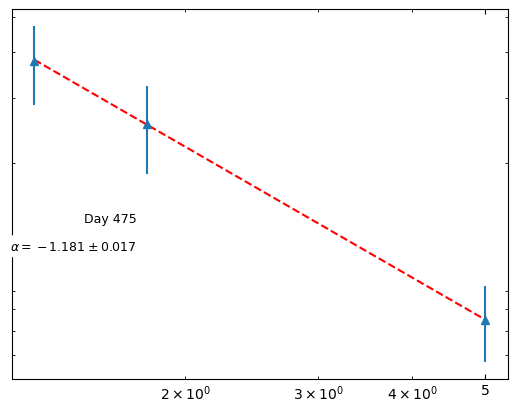

In [132]:
#plotting to check
fig,ax = plt.subplots()
mask = df22['Flux (mJy)'] > 3 * df22['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df22['Freq (GHz)'][mask], df22['Flux (mJy)'][mask], yerr=yerr22, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 475', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.181 \\pm 0.017}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 611 (df24)

In [133]:
#(work for anything with 3+ points)
mask = df24['Flux (mJy)'] > 3 * df24['eFlux (mJy)']  # apply detection threshold

x24 = df24['Freq (GHz)'][mask].values.tolist()
y24 = df24['Flux (mJy)'][mask].values.tolist()
yerr24 = df24['eFlux (mJy)'][mask].values.tolist()


In [134]:
yerr24 = error(yerr24, x24, y24)

In [135]:
PL24 =  PowerLaw1D(amplitude = y24[0], x_0= x24[0], alpha= -2.5, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit24 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model24 = fit24(PL24, x24, y24)


#weight is 1/error^2
y_weight24 = 1/ (np.power(yerr24, 2))  

# fit the data using the uncertainties as weights
fit_model_weights24 = fit24(PL24, x24, y24, weights=y_weight24)

fit_model_weights24


<PowerLaw1D(amplitude=0.0592, x_0=13.5, alpha=-0.31792997)>

In [136]:
fit24.fit_info

{'nfev': 6,
 'fvec': array([0., 0.]),
 'fjac': array([[-4.25517372e+03,  6.88507132e-01],
        [ 2.39629259e+01,  2.52410202e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-1.92931707e-09, -2.03221975e-09]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[1.05006069e-07, 8.83911409e-06],
        [8.83911409e-06, 1.56958988e-03]])}

In [137]:
#taking fvec
fvec24 = np.array([0.00000000e+00, 4.28326784e-14])
var24 = np.var(fvec24)

#taking cov_x
cov_x24 = np.array([[1.05006069e-07, 8.83911409e-06],
        [8.83911409e-06, 1.56958988e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag24 = stand(cov_x24)#*var24) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag24[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03961804992676949


In [138]:
alpha_err24 = two_points(y24,x24,yerr24)
print(alpha_err24)

(0.3179299673541062, 2.1366411620265344)


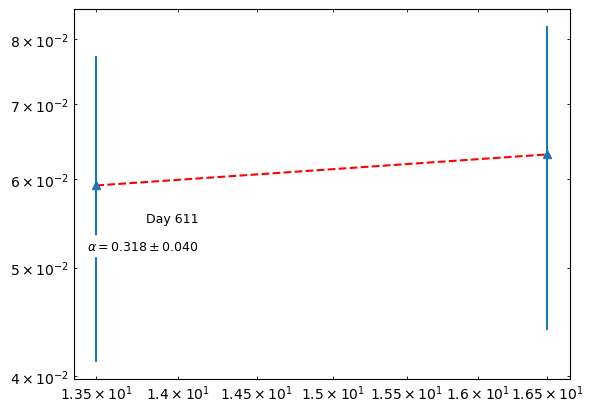

In [139]:
#plotting to check
fig,ax = plt.subplots()
mask = df24['Flux (mJy)'] > 3 * df24['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df24['Freq (GHz)'][mask], df24['Flux (mJy)'][mask], yerr=yerr24, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 611', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df24['Freq (GHz)'][mask], fit_model_weights24(df24['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.318 \\pm 0.040}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 687 (df25)

In [140]:
#(work for anything with 3+ points)
mask = df25['Flux (mJy)'] > 3 * df25['eFlux (mJy)']  # apply detection threshold

x25 = df25['Freq (GHz)'][mask].values.tolist()
y25 = df25['Flux (mJy)'][mask].values.tolist()
yerr25 = df25['eFlux (mJy)'][mask].values.tolist()


In [141]:
yerr25 = error(yerr25, x25, y25)

In [142]:
PL25 =  PowerLaw1D(amplitude = y25[0], x_0= x25[0], alpha= 0.3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit25 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model25 = fit25(PL25, x25, y25)


#weight is 1/error^2
y_weight25 = 1/ (np.power(yerr25, 2))  

# fit the data using the uncertainties as weights
fit_model_weights25 = fit25(PL25, x25, y25, weights=y_weight25)

fit_model_weights25


<PowerLaw1D(amplitude=0.10006051, x_0=4.17652085, alpha=-0.05894521)>

In [143]:
fit25.fit_info

{'nfev': 15,
 'fvec': array([-30.62859961,  32.91619349, -18.57818722]),
 'fjac': array([[-3.06579935e+03,  1.47334454e+02,  4.38555049e+00],
        [ 1.47334454e+02,  1.25688931e+02,  4.84965564e-15],
        [ 4.38555049e+00,  1.27650198e-16, -4.25347685e-16]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-2.95309214e-04,  1.80243001e-03,  4.86491104e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[ 1.13102611e+25,  7.90664502e+27, -8.03002135e+09],
        [ 7.90664502e+27,  5.52728493e+30, -5.61353341e+12],
        [-8.03002135e+09, -5.61353341e+12,  6.90014520e-05]])}

In [144]:
#taking fvec
fvec25 = np.array([-30.62859961,  32.91619349, -18.57818722])
var25 = np.var(fvec25)

#taking cov_x
cov_x25 = np.array([[ 1.13102611e+25,  7.90664502e+27, -8.03002135e+09],
        [ 7.90664502e+27,  5.52728493e+30, -5.61353341e+12],
        [-8.03002135e+09, -5.61353341e+12,  6.90014520e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag25 = stand(cov_x25*var25) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag25[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.2289135714396403


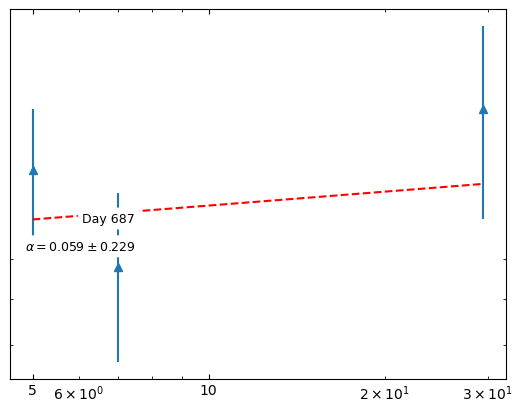

In [145]:
#plotting to check
fig,ax = plt.subplots()
mask = df25['Flux (mJy)'] > 3 * df25['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df25['Freq (GHz)'][mask], df25['Flux (mJy)'][mask], yerr=yerr25, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 687', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df25['Freq (GHz)'][mask], fit_model_weights25(df25['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.059 \\pm 0.229}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 747 (df26)

In [146]:
#(work for anything with 3+ points)
mask = df26['Flux (mJy)'] > 3 * df26['eFlux (mJy)']  # apply detection threshold

x26 = df26['Freq (GHz)'][mask].values.tolist()
y26 = df26['Flux (mJy)'][mask].values.tolist()
yerr26 = df26['eFlux (mJy)'][mask].values.tolist()


In [147]:
yerr26 = error(yerr26, x26, y26)

In [148]:
PL26 =  PowerLaw1D(amplitude = y26[0], x_0= x26[0], alpha= -2, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit26 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model26 = fit26(PL26, x26, y26)


#weight is 1/error^2
y_weight26 = 1/ (np.power(yerr26, 2))  

# fit the data using the uncertainties as weights
fit_model_weights26 = fit26(PL26, x26, y26, weights=y_weight26)

fit_model_weights26


<PowerLaw1D(amplitude=0.0606, x_0=5., alpha=-0.06787928)>

In [149]:
fit26.fit_info

{'nfev': 6,
 'fvec': array([0., 0.]),
 'fjac': array([[-5.76521089e+03,  7.56410152e-01],
        [ 6.72592091e+01,  5.81616834e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-9.49425870e-07, -8.21005891e-07]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[7.03209097e-08, 3.44875721e-06],
        [3.44875721e-06, 2.95614725e-04]])}

In [150]:
#taking fvec
fvec26 = np.array([0., 0.])
var26 = np.var(fvec26)

#taking cov_x
cov_x26 = np.array([[7.03209097e-08, 3.44875721e-06],
        [3.44875721e-06, 2.95614725e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag26 = stand(cov_x26)#*var26) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag26[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.017193450060997068


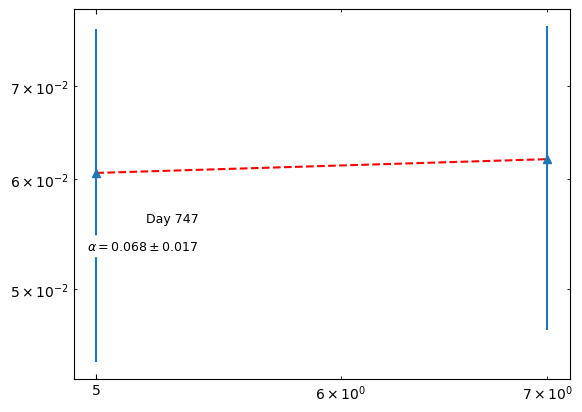

In [151]:
#plotting to check
fig,ax = plt.subplots()
mask = df26['Flux (mJy)'] > 3 * df26['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df26['Freq (GHz)'][mask], df26['Flux (mJy)'][mask], yerr=yerr26, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 747', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df26['Freq (GHz)'][mask], fit_model_weights26(df26['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.068 \\pm 0.017}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## All Together Now

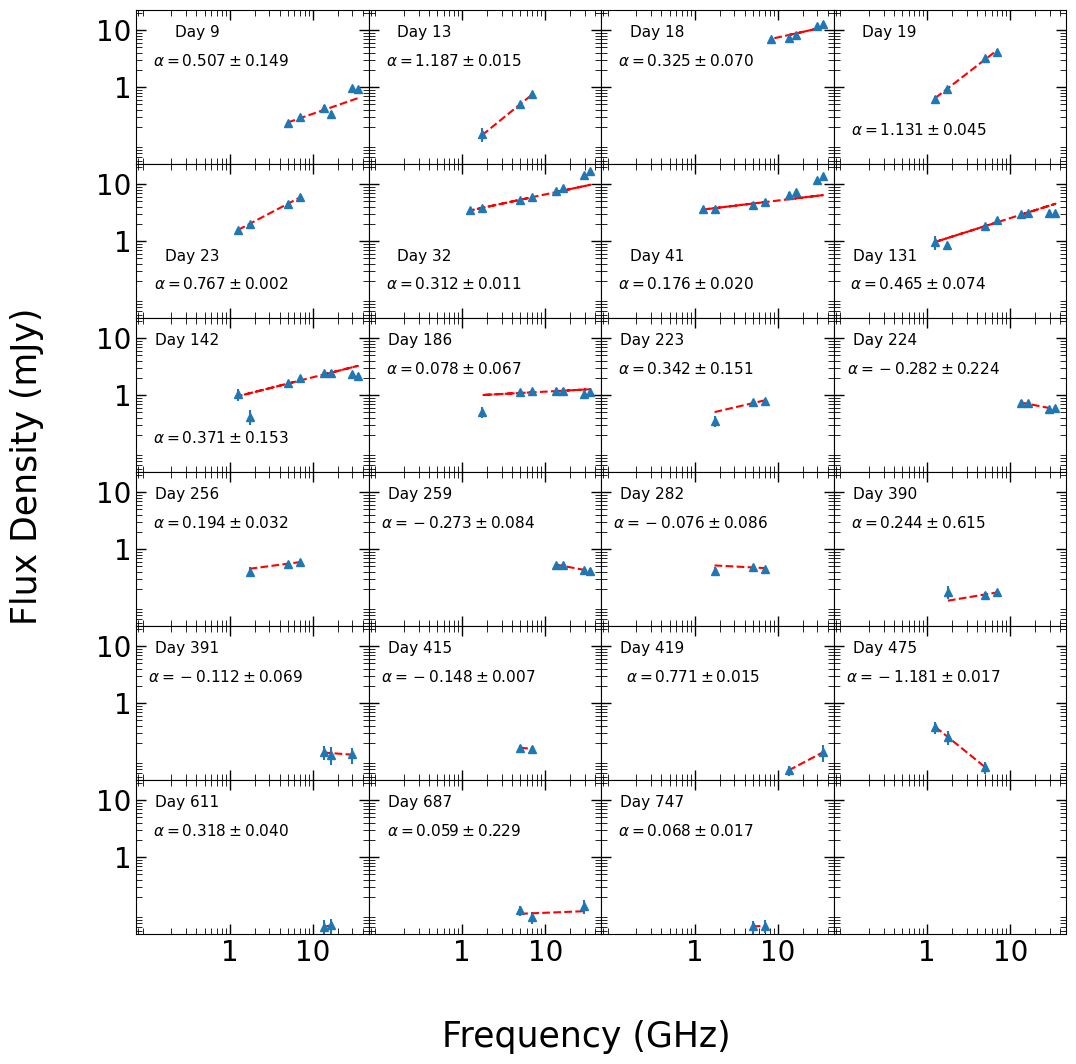

In [155]:
#four by four

fig, ax = plt.subplots(6, 4, sharex='all', sharey='all',squeeze=True, width_ratios=None, height_ratios=None)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=0, wspace=0)

#first row
mask = df2['Flux (mJy)'] > 3 * df2['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df2['Freq (GHz)'][mask], df2['Flux (mJy)'][mask], yerr=yerr2, fmt='^')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[0,0].annotate('Day 9', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,0].plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = 0.507 \\pm 0.149}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df3['Flux (mJy)'] > 3 * df3['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df3['Freq (GHz)'][mask], df3['Flux (mJy)'][mask], yerr=yerr3, fmt='^')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,1].annotate('Day 13', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,1].plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = 1.187 \\pm 0.015}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux (mJy)'] > 3 * df4['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,2].errorbar(df4['Freq (GHz)'][mask], df4['Flux (mJy)'][mask], yerr=yerr4, fmt='^')
    ax[0,2].set_xscale('log')
    ax[0,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,2].set_yscale('log')
    ax[0,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,2].annotate('Day 18', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,2].plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax[0,2].annotate('${\u03B1 = 0.325 \\pm 0.070}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


mask = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,3].errorbar(df5['Freq (GHz)'][mask], df5['Flux (mJy)'][mask], yerr=yerr5, fmt='^')
    ax[0,3].set_xscale('log')
    ax[0,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,3].set_yscale('log')
    ax[0,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,3].annotate('Day 19', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,3].plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax[0,3].annotate('${\u03B1 = 1.131 \\pm 0.045}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#second row
mask = df6['Flux (mJy)'] > 3 * df6['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df6['Freq (GHz)'][mask], df6['Flux (mJy)'][mask], yerr=yerr6, fmt='^')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[1,0].annotate('Day 23', xy=(60, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,0].plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = 0.767 \\pm 0.002}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux (mJy)'] > 3 * df7['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df7['Freq (GHz)'][mask], df7['Flux (mJy)'][mask], yerr=yerr7, fmt='^')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,1].annotate('Day 32', xy=(60, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,1].plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1 = 0.312 \\pm 0.011}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux (mJy)'] > 3 * df8['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,2].errorbar(df8['Freq (GHz)'][mask], df8['Flux (mJy)'][mask], yerr=yerr8, fmt='^')
    ax[1,2].set_xscale('log')
    ax[1,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,2].set_yscale('log')
    ax[1,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,2].annotate('Day 41', xy=(60, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,2].plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax[1,2].annotate('${\u03B1 = 0.176 \\pm 0.020}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df9['Flux (mJy)'] > 3 * df9['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,3].errorbar(df9['Freq (GHz)'][mask], df9['Flux (mJy)'][mask], yerr=yerr9, fmt='^')
    ax[1,3].set_xscale('log')
    ax[1,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,3].set_yscale('log')
    ax[1,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,3].annotate('Day 131', xy=(60, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,3].plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax[1,3].annotate('${\u03B1 = 0.465 \\pm 0.074}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#third row

mask = df10['Flux (mJy)'] > 3 * df10['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df10['Freq (GHz)'][mask], df10['Flux (mJy)'][mask], yerr=yerr10, fmt='^')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[2,0].annotate('Day 142', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,0].plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1 = 0.371 \\pm 0.153}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux (mJy)'] > 3 * df11['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df11['Freq (GHz)'][mask], df11['Flux (mJy)'][mask], yerr=yerr11, fmt='^')
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,1].annotate('Day 186', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,1].plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1 = 0.078 \\pm 0.067}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux (mJy)'] > 3 * df12['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,2].errorbar(df12['Freq (GHz)'][mask], df12['Flux (mJy)'][mask], yerr=yerr12, fmt='^')
    ax[2,2].set_xscale('log')
    ax[2,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,2].set_yscale('log')
    ax[2,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,2].annotate('Day 223', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,2].plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax[2,2].annotate('${\u03B1 = 0.342 \\pm 0.151}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df13['Flux (mJy)'] > 3 * df13['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,3].errorbar(df13['Freq (GHz)'][mask], df13['Flux (mJy)'][mask], yerr=yerr13, fmt='^')
    ax[2,3].set_xscale('log')
    ax[2,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,3].set_yscale('log')
    ax[2,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,3].annotate('Day 224', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2,3].plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax[2,3].annotate('${\u03B1 = -0.282 \\pm 0.224}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#fourth row
mask = df14['Flux (mJy)'] > 3 * df14['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df14['Freq (GHz)'][mask], df14['Flux (mJy)'][mask], yerr=yerr14, fmt='^')
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[3,0].annotate('Day 256', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,0].plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax[3,0].annotate('${\u03B1 = 0.194 \\pm 0.032}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df15['Flux (mJy)'] > 3 * df15['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df15['Freq (GHz)'][mask], df15['Flux (mJy)'][mask], yerr=yerr15, fmt='^')
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,1].annotate('Day 259', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,1].plot(df15['Freq (GHz)'][mask], fit_model_weights15(df15['Freq (GHz)'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = -0.273 \\pm 0.084}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df16['Flux (mJy)'] > 3 * df16['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,2].errorbar(df16['Freq (GHz)'][mask], df16['Flux (mJy)'][mask], yerr=yerr16, fmt='^')
    ax[3,2].set_xscale('log')
    ax[3,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,2].set_yscale('log')
    ax[3,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,2].annotate('Day 282', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,2].plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax[3,2].annotate('${\u03B1 = -0.076 \\pm 0.086}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df17['Flux (mJy)'] > 3 * df17['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,3].errorbar(df17['Freq (GHz)'][mask], df17['Flux (mJy)'][mask], yerr=yerr17, fmt='^')
    ax[3,3].set_xscale('log')
    ax[3,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,3].set_yscale('log')
    ax[3,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,3].annotate('Day 390', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,3].plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax[3,3].annotate('${\u03B1 = 0.244 \\pm 0.615}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#fifth row
mask = df18['Flux (mJy)'] > 3 * df18['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,0].errorbar(df18['Freq (GHz)'][mask], df18['Flux (mJy)'][mask], yerr=yerr18, fmt='^')
    ax[4,0].set_xscale('log')
    ax[4,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[4,0].set_yscale('log')
    ax[4,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[4,0].annotate('Day 391', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,0].plot(df18['Freq (GHz)'][mask], fit_model_weights18(df18['Freq (GHz)'][mask]), 'r--')
    ax[4,0].annotate('${\u03B1 = -0.112 \\pm 0.069}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df19['Flux (mJy)'] > 3 * df19['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,1].errorbar(df19['Freq (GHz)'][mask], df19['Flux (mJy)'][mask], yerr=yerr19, fmt='^')
    ax[4,1].set_xscale('log')
    ax[4,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,1].set_yscale('log')
    ax[4,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,1].annotate('Day 415', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,1].plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax[4,1].annotate('${\u03B1 = -0.148 \\pm 0.007}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df20['Flux (mJy)'] > 3 * df20['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,2].errorbar(df20['Freq (GHz)'][mask], df20['Flux (mJy)'][mask], yerr=yerr20, fmt='^')
    ax[4,2].set_xscale('log')
    ax[4,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,2].set_yscale('log')
    ax[4,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,2].annotate('Day 419', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,2].plot(df20['Freq (GHz)'][mask], fit_model_weights20(df20['Freq (GHz)'][mask]), 'r--')
    ax[4,2].annotate('${\u03B1 = 0.771 \\pm 0.015}$', xy=(115, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df22['Flux (mJy)'] > 3 * df22['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,3].errorbar(df22['Freq (GHz)'][mask], df22['Flux (mJy)'][mask], yerr=yerr22, fmt='^')
    ax[4,3].set_xscale('log')
    ax[4,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,3].set_yscale('log')
    ax[4,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,3].annotate('Day 475', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,3].plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax[4,3].annotate('${\u03B1 = -1.181 \\pm 0.017}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#sixth row
mask = df24['Flux (mJy)'] > 3 * df24['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,0].errorbar(df24['Freq (GHz)'][mask], df24['Flux (mJy)'][mask], yerr=yerr24, fmt='^')
    ax[5,0].set_xscale('log')
    ax[5,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[5,0].set_yscale('log')
    ax[5,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[5,0].annotate('Day 611', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[5,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[5,0].plot(df24['Freq (GHz)'][mask], fit_model_weights24(df24['Freq (GHz)'][mask]), 'r--')
    ax[5,0].annotate('${\u03B1 = 0.318 \\pm 0.040}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df25['Flux (mJy)'] > 3 * df25['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,1].errorbar(df25['Freq (GHz)'][mask], df25['Flux (mJy)'][mask], yerr=yerr25, fmt='^')
    ax[5,1].set_xscale('log')
    ax[5,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[5,1].set_yscale('log')
    ax[5,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[5,1].annotate('Day 687', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[5,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[5,1].plot(df25['Freq (GHz)'][mask], fit_model_weights25(df25['Freq (GHz)'][mask]), 'r--')
    ax[5,1].annotate('${\u03B1 = 0.059 \\pm 0.229}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df26['Flux (mJy)'] > 3 * df26['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,2].errorbar(df26['Freq (GHz)'][mask], df26['Flux (mJy)'][mask], yerr=yerr26, fmt='^')
    ax[5,2].set_xscale('log')
    ax[5,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[5,2].set_yscale('log')
    ax[5,2].set_yticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[5,2].annotate('Day 747', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[5,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[5,2].plot(df26['Freq (GHz)'][mask], fit_model_weights26(df26['Freq (GHz)'][mask]), 'r--')
    ax[5,2].annotate('${\u03B1 = 0.068 \\pm 0.017}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

ax[5,3].set_xscale('log')
ax[5,3].set_xticks([1,  10], labels=['1',  '10'], fontsize=20)
ax[5,3].set_yscale('log')
ax[5,3].set_yticks([1, 10], labels=['1', '10'], fontsize=20)
ax[5,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[5,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)


fig.supxlabel("Frequency (GHz)", fontsize=25)
fig.supylabel("Flux Density (mJy)", fontsize=25)
plt.savefig("V392Per_SI.png")
#plt.legend()
plt.show();